# Subclustering of Posterior midgut/ Hindgut/ Ecto. PS14 of bcd-RNAi data

In [1]:
#load packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv

In [3]:
# loading data
seu_HQC <- readRDS(file = '../../data/seurat_object/bcdRNAi/seu_HQC2_bcdRNAi.obj')
seu_HQC

An object of class Seurat 
28612 features across 6473 samples within 2 assays 
Active assay: SCT (11108 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


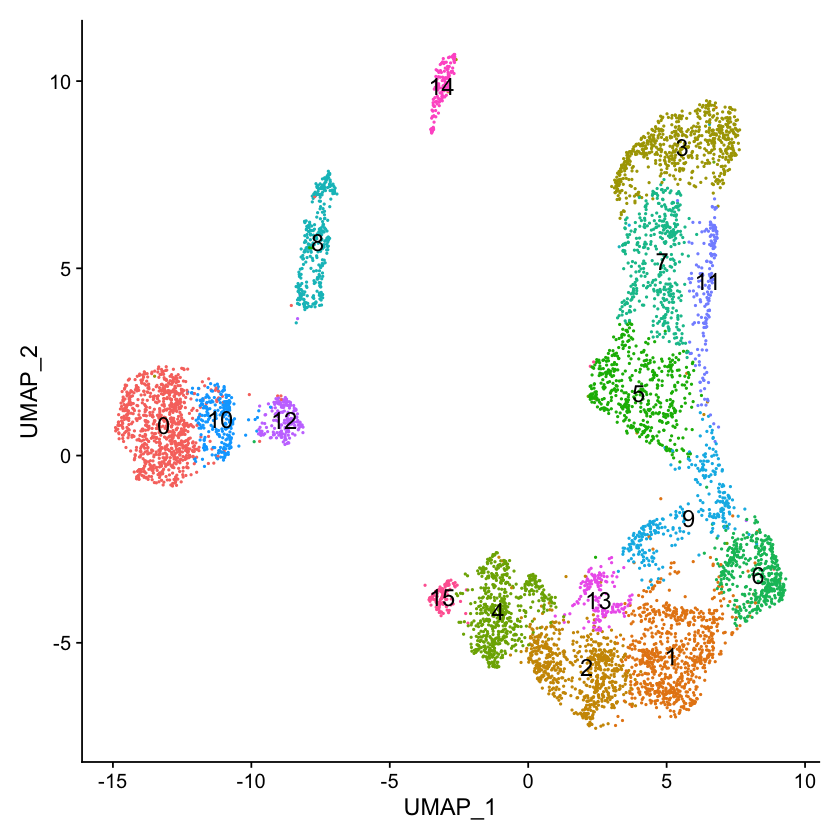

In [4]:
Idents(seu_HQC) <- 'seurat_clusters'
DimPlot(seu_HQC, reduction =  "umap", label = TRUE, label.size = 5) + NoLegend()

## Picking up target clusters

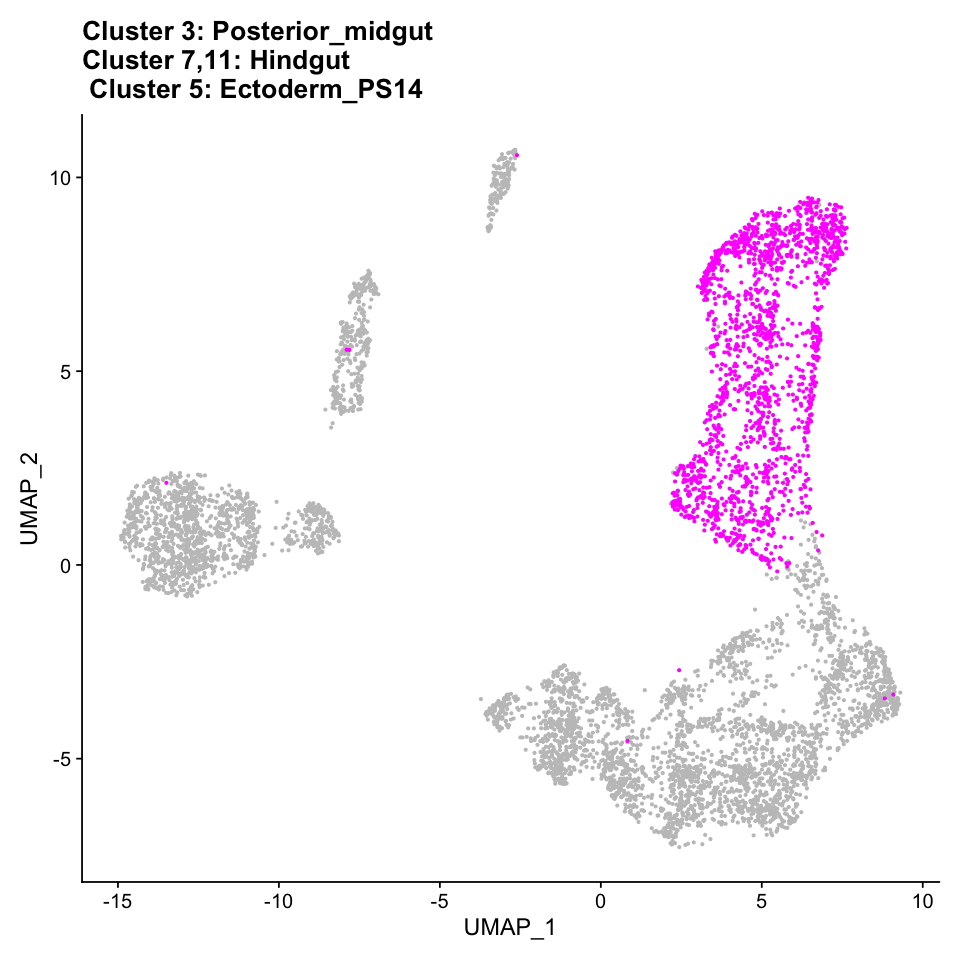

In [5]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(3,7,11,5))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend() + ggtitle(
    'Cluster 3: Posterior_midgut\nCluster 7,11: Hindgut\n Cluster 5: Ectoderm_PS14')

In [6]:
seu.post <- subset(seu_HQC, idents = c(3,7,11,5))
seu.post

An object of class Seurat 
28612 features across 1705 samples within 2 assays 
Active assay: SCT (11108 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

In [7]:
seu.post$cluster.allcell <- seu.post$seurat_clusters

## Re-normalizatin and Clustering

In [8]:
DefaultAssay(seu.post) <- "RNA"
seu.post <- suppressWarnings(SCTransform(seu.post, vars.to.regress = c("percent.mt", "percent.rRNA")))

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9329 by 1705

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1705 cells



  |======================================================================| 100%


Found 139 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9329 genes



  |======================================================================| 100%


Computing corrected count matrix for 9329 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 18.23288 secs

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt, percent.rRNA

Centering data matrix

Set default assay to SCT



PC_ 1 
Positive:  Abd-B, ken, salm, trn, Antp, chrb, stg, ftz, SoxN, toc 
	   lncRNA:iab8, Blimp-1, D, CG10035, Brd, opa, 5-HT2A, wech, Ppa, wb 
	   dan, robo2, aop, ImpL2, dpn, CG15628, prd, CG13465, hth, ths 
Negative:  ps, Myc, Pdp1, peb, Nplp2, fkh, CG2930, Oatp74D, sas, bru2 
	   smal, ImpE2, spri, Gmap, Pepck-CG45087, mnd, srp, Fas2, Tis11, fog 
	   hkb, cv-c, CG32053, Ndae1, MFS14, RapGAP1, Thor, DNaseII, Sema5c, RpLP1 
PC_ 2 
Positive:  sog, Mdr49, SoxN, CG43355-sala, trn, brk, Ndae1, fend, CG16758, Dl 
	   GlcAT-P, Nplp2, sim, ImpL2, Zasp52, cv-c, ogre, ths, E(spl)m7-HLH, CG2930 
	   lncRNA:roX1, E(spl)m6-BFM, sca, E(spl)m4-BFM, hll, Kr, Myc, drm, Thor, E(spl)m8-HLH 
Negative:  cv-2, Doc1, CG45263, klg, tup, side-V, egr, Doc3, CG42342, disco 
	   Doc2, sas, peb, Dtg, rst, hbs, olf413, ush, Wnt2, tll 
	   Fs, Ptp99A, net, rib, salm, Btk29A, cno, Svil, CG13653, CG7029 
PC_ 3 
Positive:  hth, peb, ps, ftz, Abd-B, bru2, Antp, trn, opa, smal 
	   SoxN, toc, Myc, ken, mid, tsh, spri

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1705
Number of edges: 60181

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7401
Number of communities: 8
Elapsed time: 0 seconds


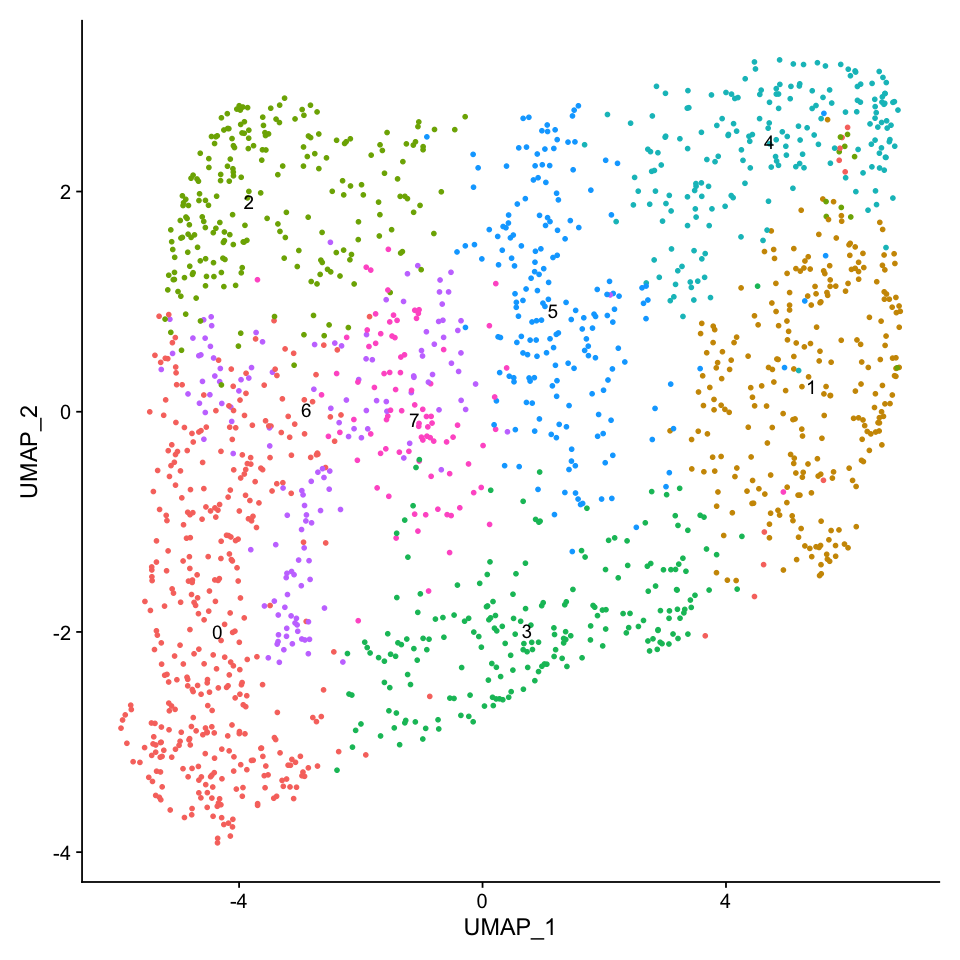

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
seu.post <- RunPCA(seu.post)
seu.post <- RunUMAP(seu.post, dims = 1:30)
seu.post <- FindNeighbors(seu.post, dims = 1:30)
seu.post <- FindClusters(seu.post)
DimPlot(seu.post, reduction = 'umap', label = T) + NoLegend()

In [10]:
levels(seu.post) <- c(4,1,5,3,7,6,2,0)
all.markers.post <- FindAllMarkers(object = seu.post, only.pos = TRUE)
nrow(all.markers.post)
all.markers.post.top10 <- all.markers.post %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.post.top10)

Calculating cluster 4

Calculating cluster 1

Calculating cluster 5

Calculating cluster 3

Calculating cluster 7

Calculating cluster 6

Calculating cluster 2

Calculating cluster 0



[1] 898

[1] 80

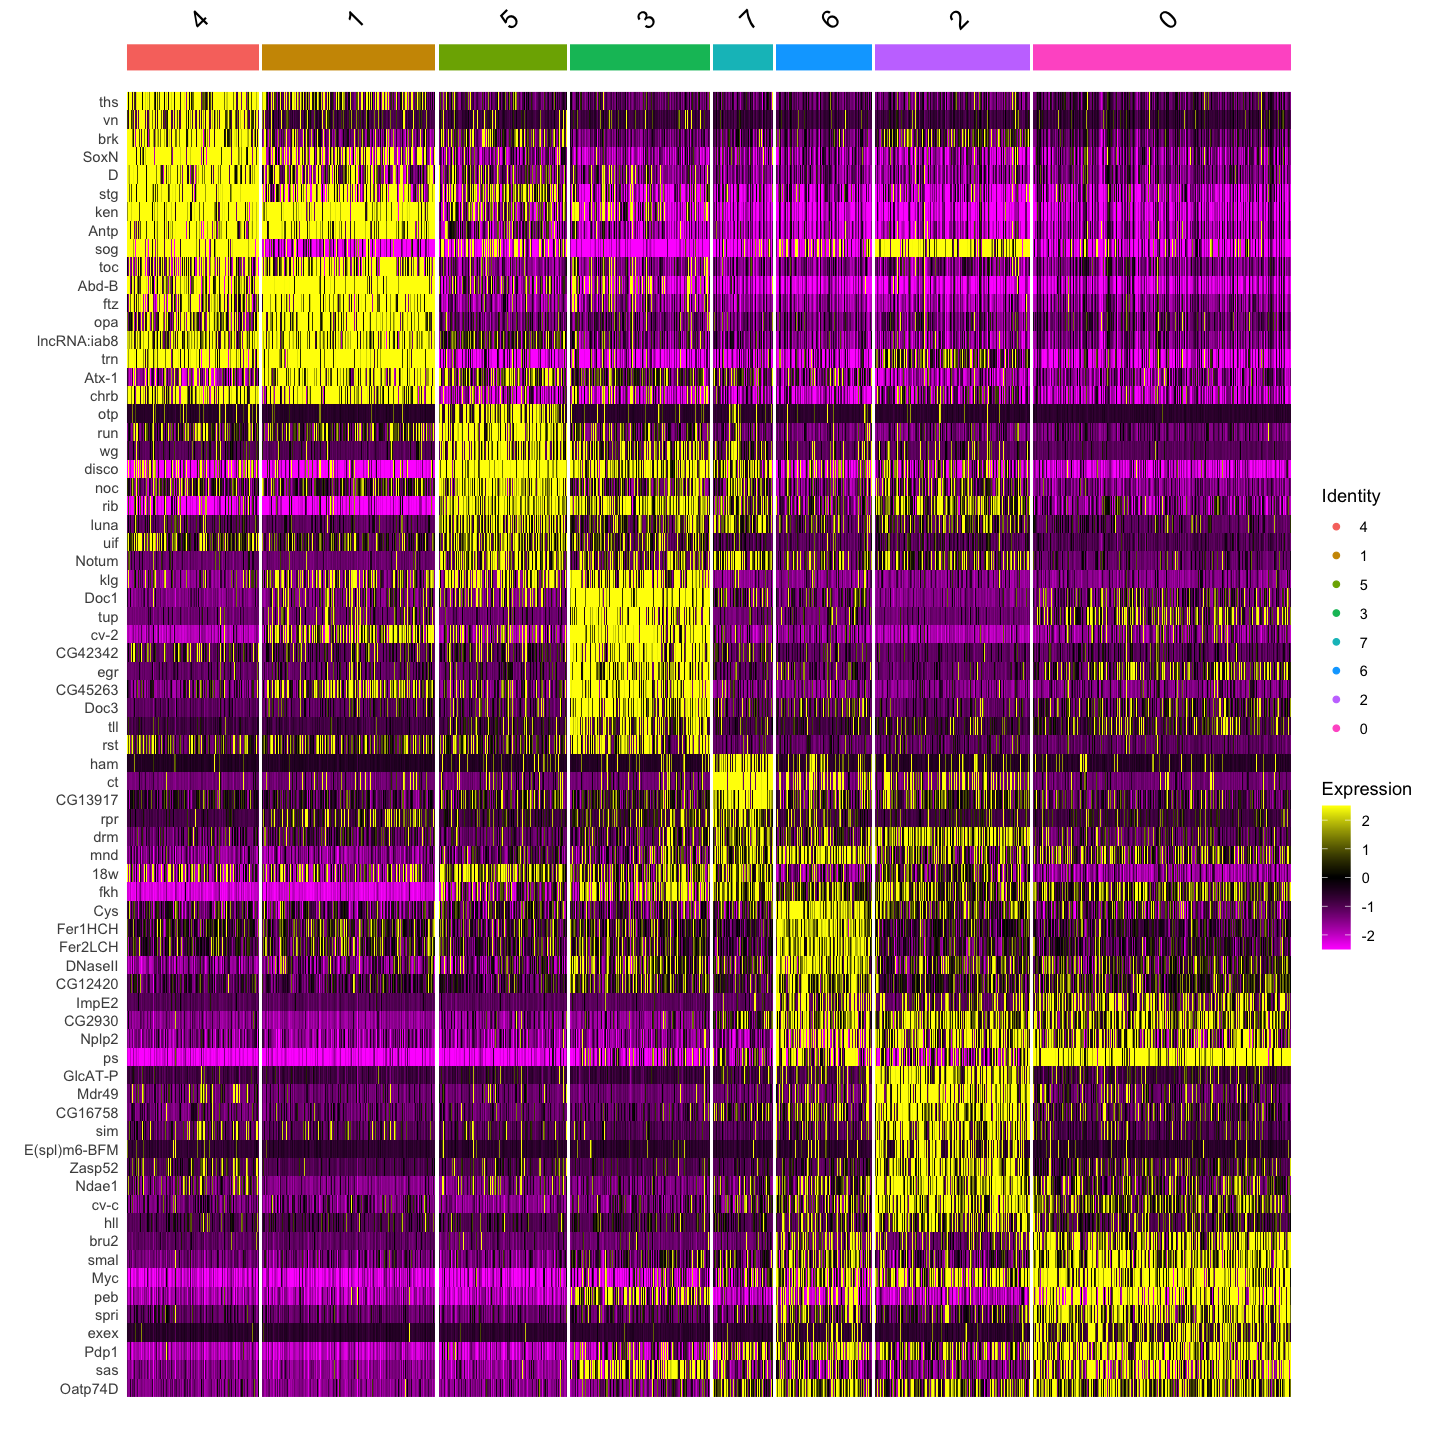

In [11]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.post, features = c(all.markers.post.top10$gene))

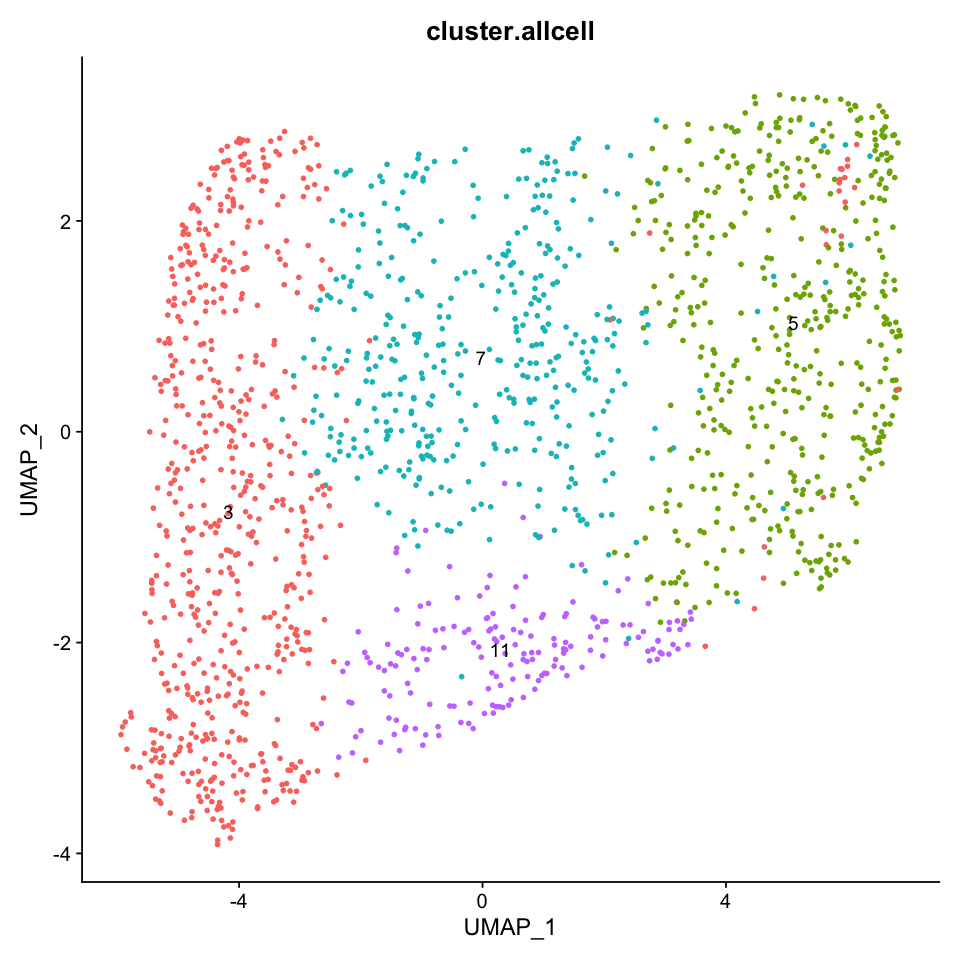

In [12]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.post, reduction = 'umap', label = T, group.by = 'cluster.allcell') + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1705
Number of edges: 60181

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7901
Number of communities: 5
Elapsed time: 0 seconds


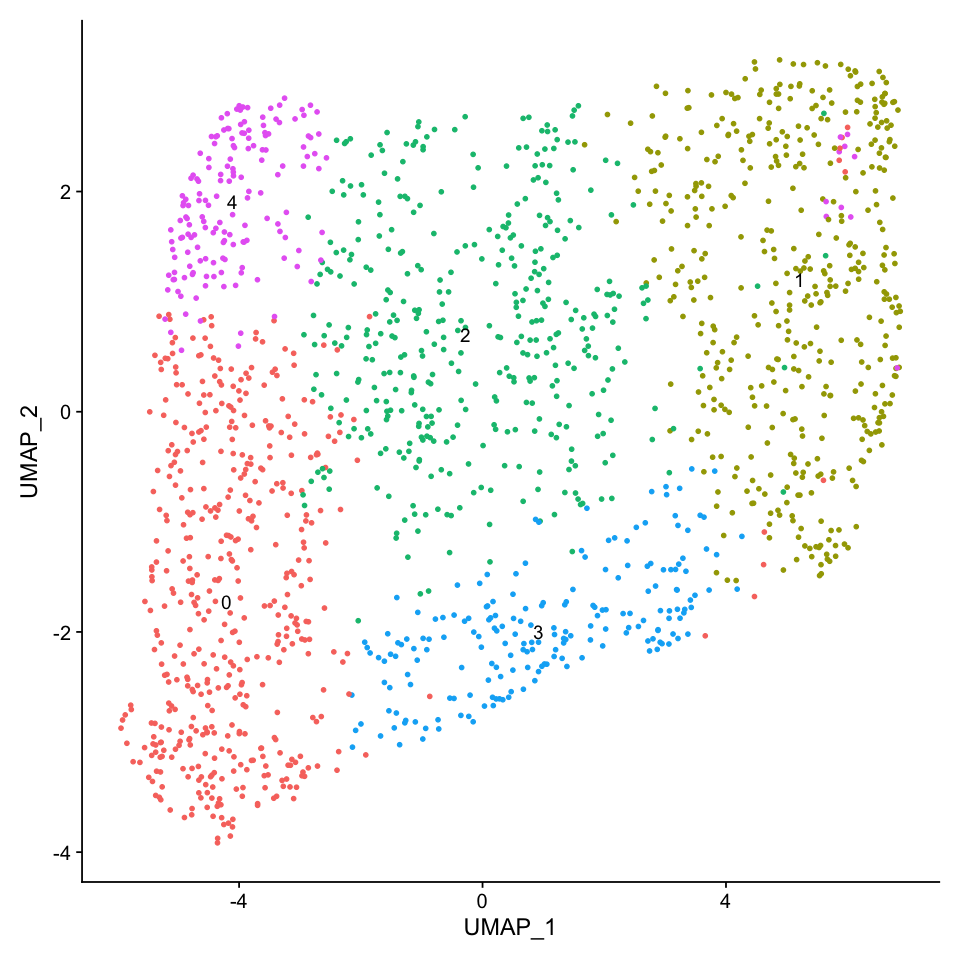

In [13]:
options(repr.plot.width=8, repr.plot.height=8)
seu.post <- FindClusters(seu.post, resolution = 0.5)
DimPlot(seu.post, reduction = 'umap', label = T) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1705
Number of edges: 60181

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7171
Number of communities: 9
Elapsed time: 0 seconds


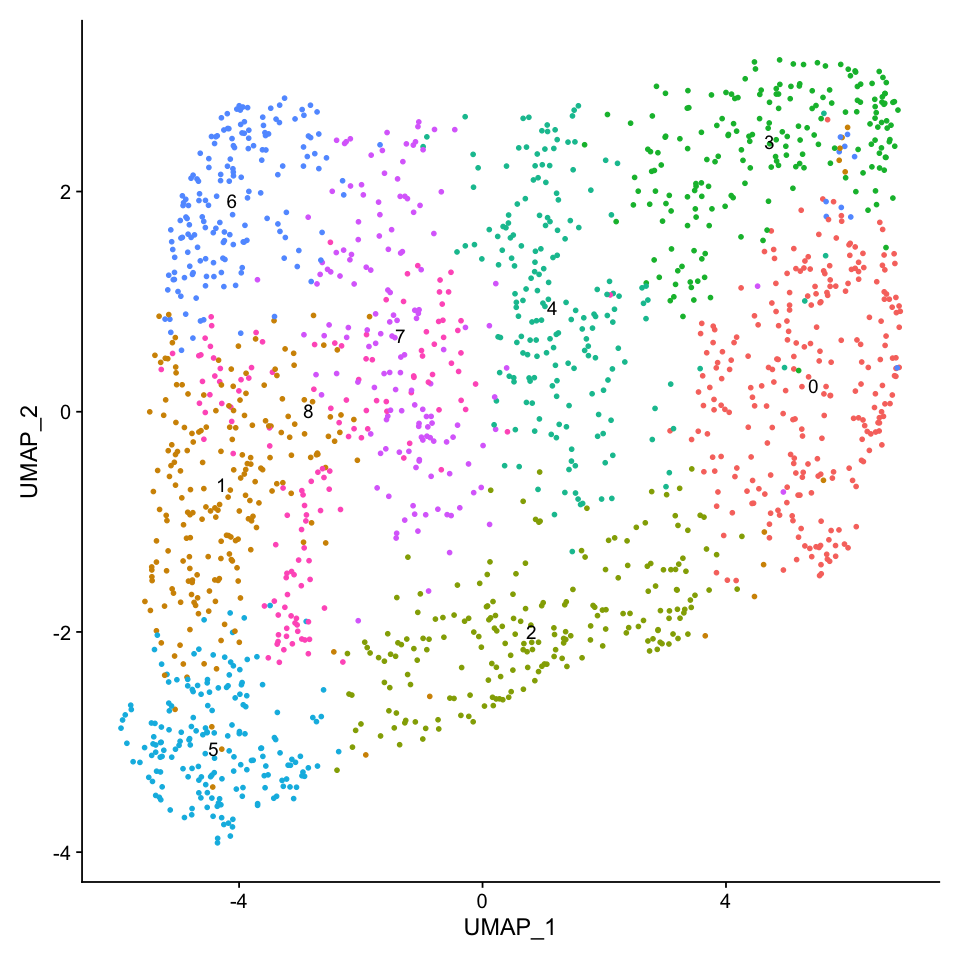

In [14]:
options(repr.plot.width=8, repr.plot.height=8)
seu.post <- FindClusters(seu.post, resolution = 1.0)
DimPlot(seu.post, reduction = 'umap', label = T) + NoLegend()

In [15]:
levels(seu.post) <- c(3,0,4,7,2,8,6,1,5)
all.markers.post <- FindAllMarkers(object = seu.post, only.pos = TRUE)
nrow(all.markers.post)
all.markers.post.top10 <- all.markers.post %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.post.top10)

Calculating cluster 3

Calculating cluster 0

Calculating cluster 4

Calculating cluster 7

Calculating cluster 2

Calculating cluster 8

Calculating cluster 6

Calculating cluster 1

Calculating cluster 5



[1] 1003

[1] 90

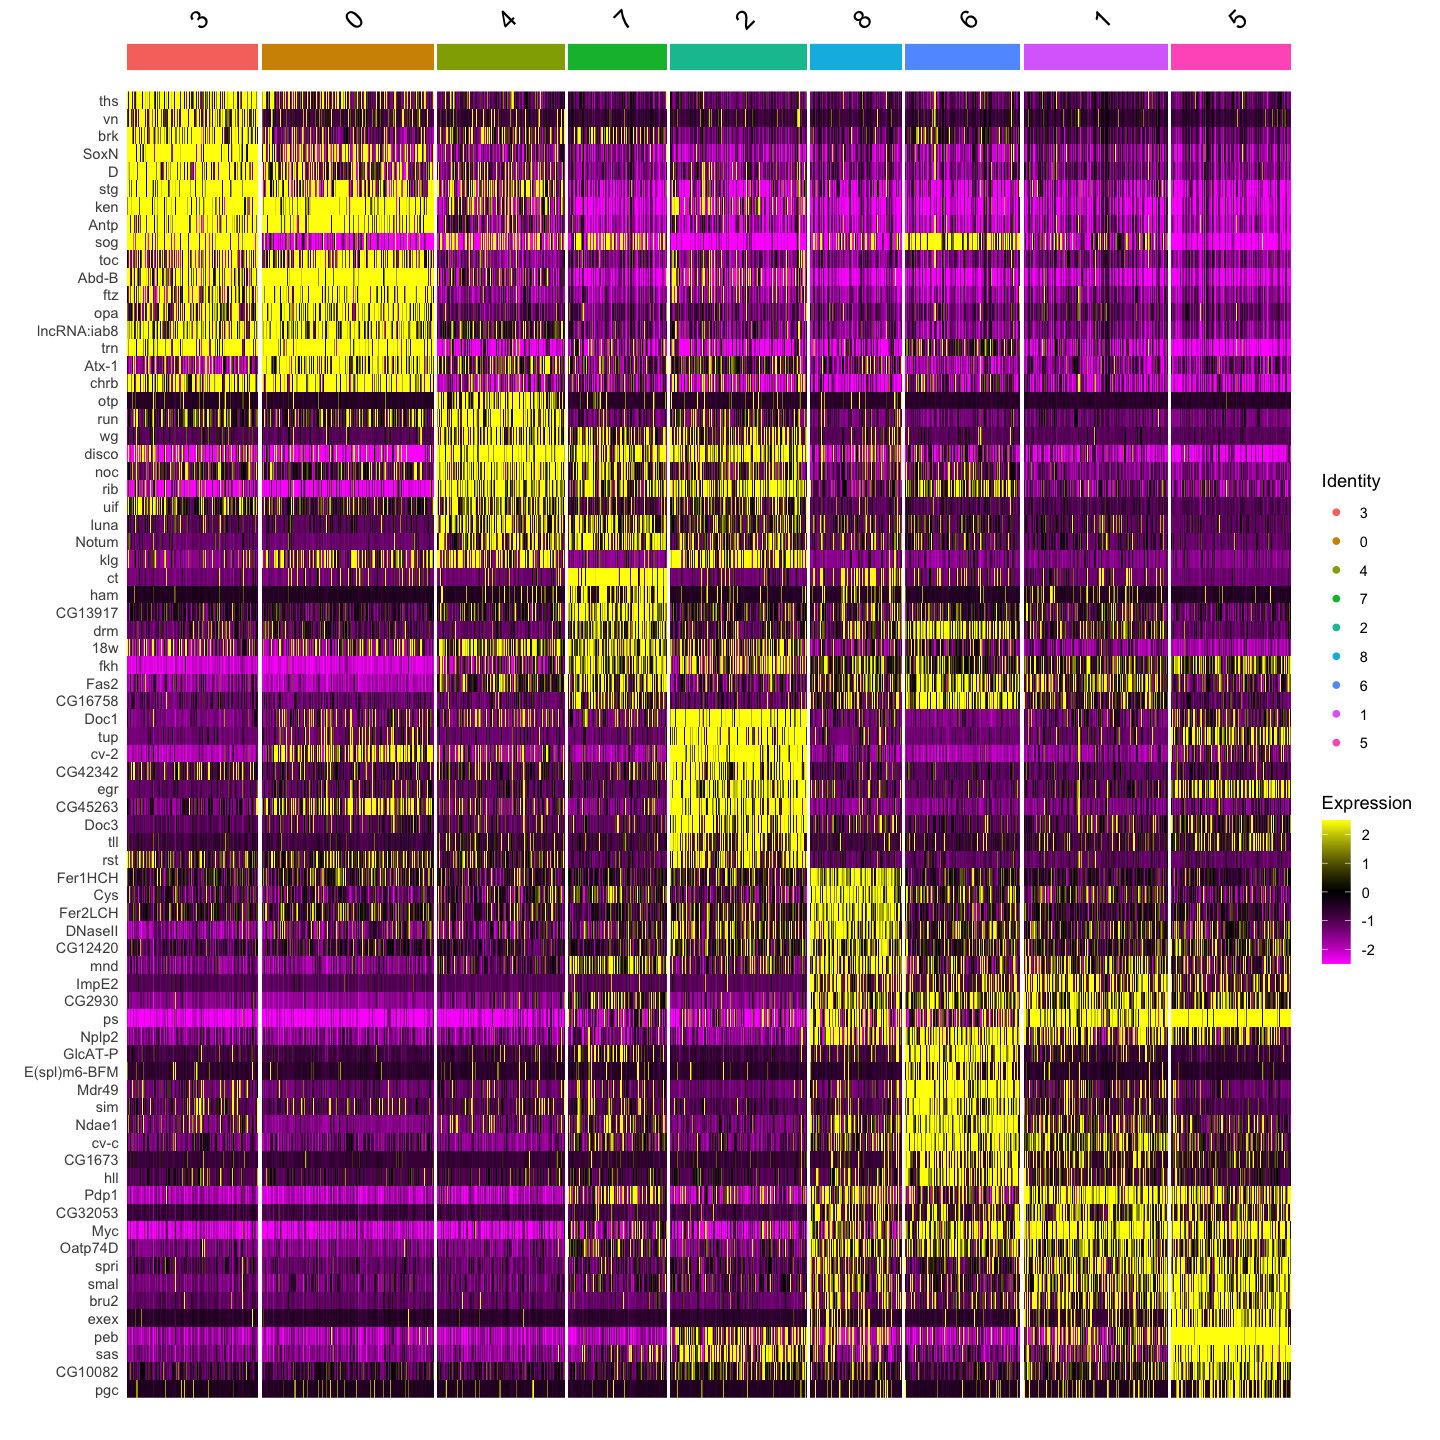

In [16]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.post, features = c(all.markers.post.top10$gene))

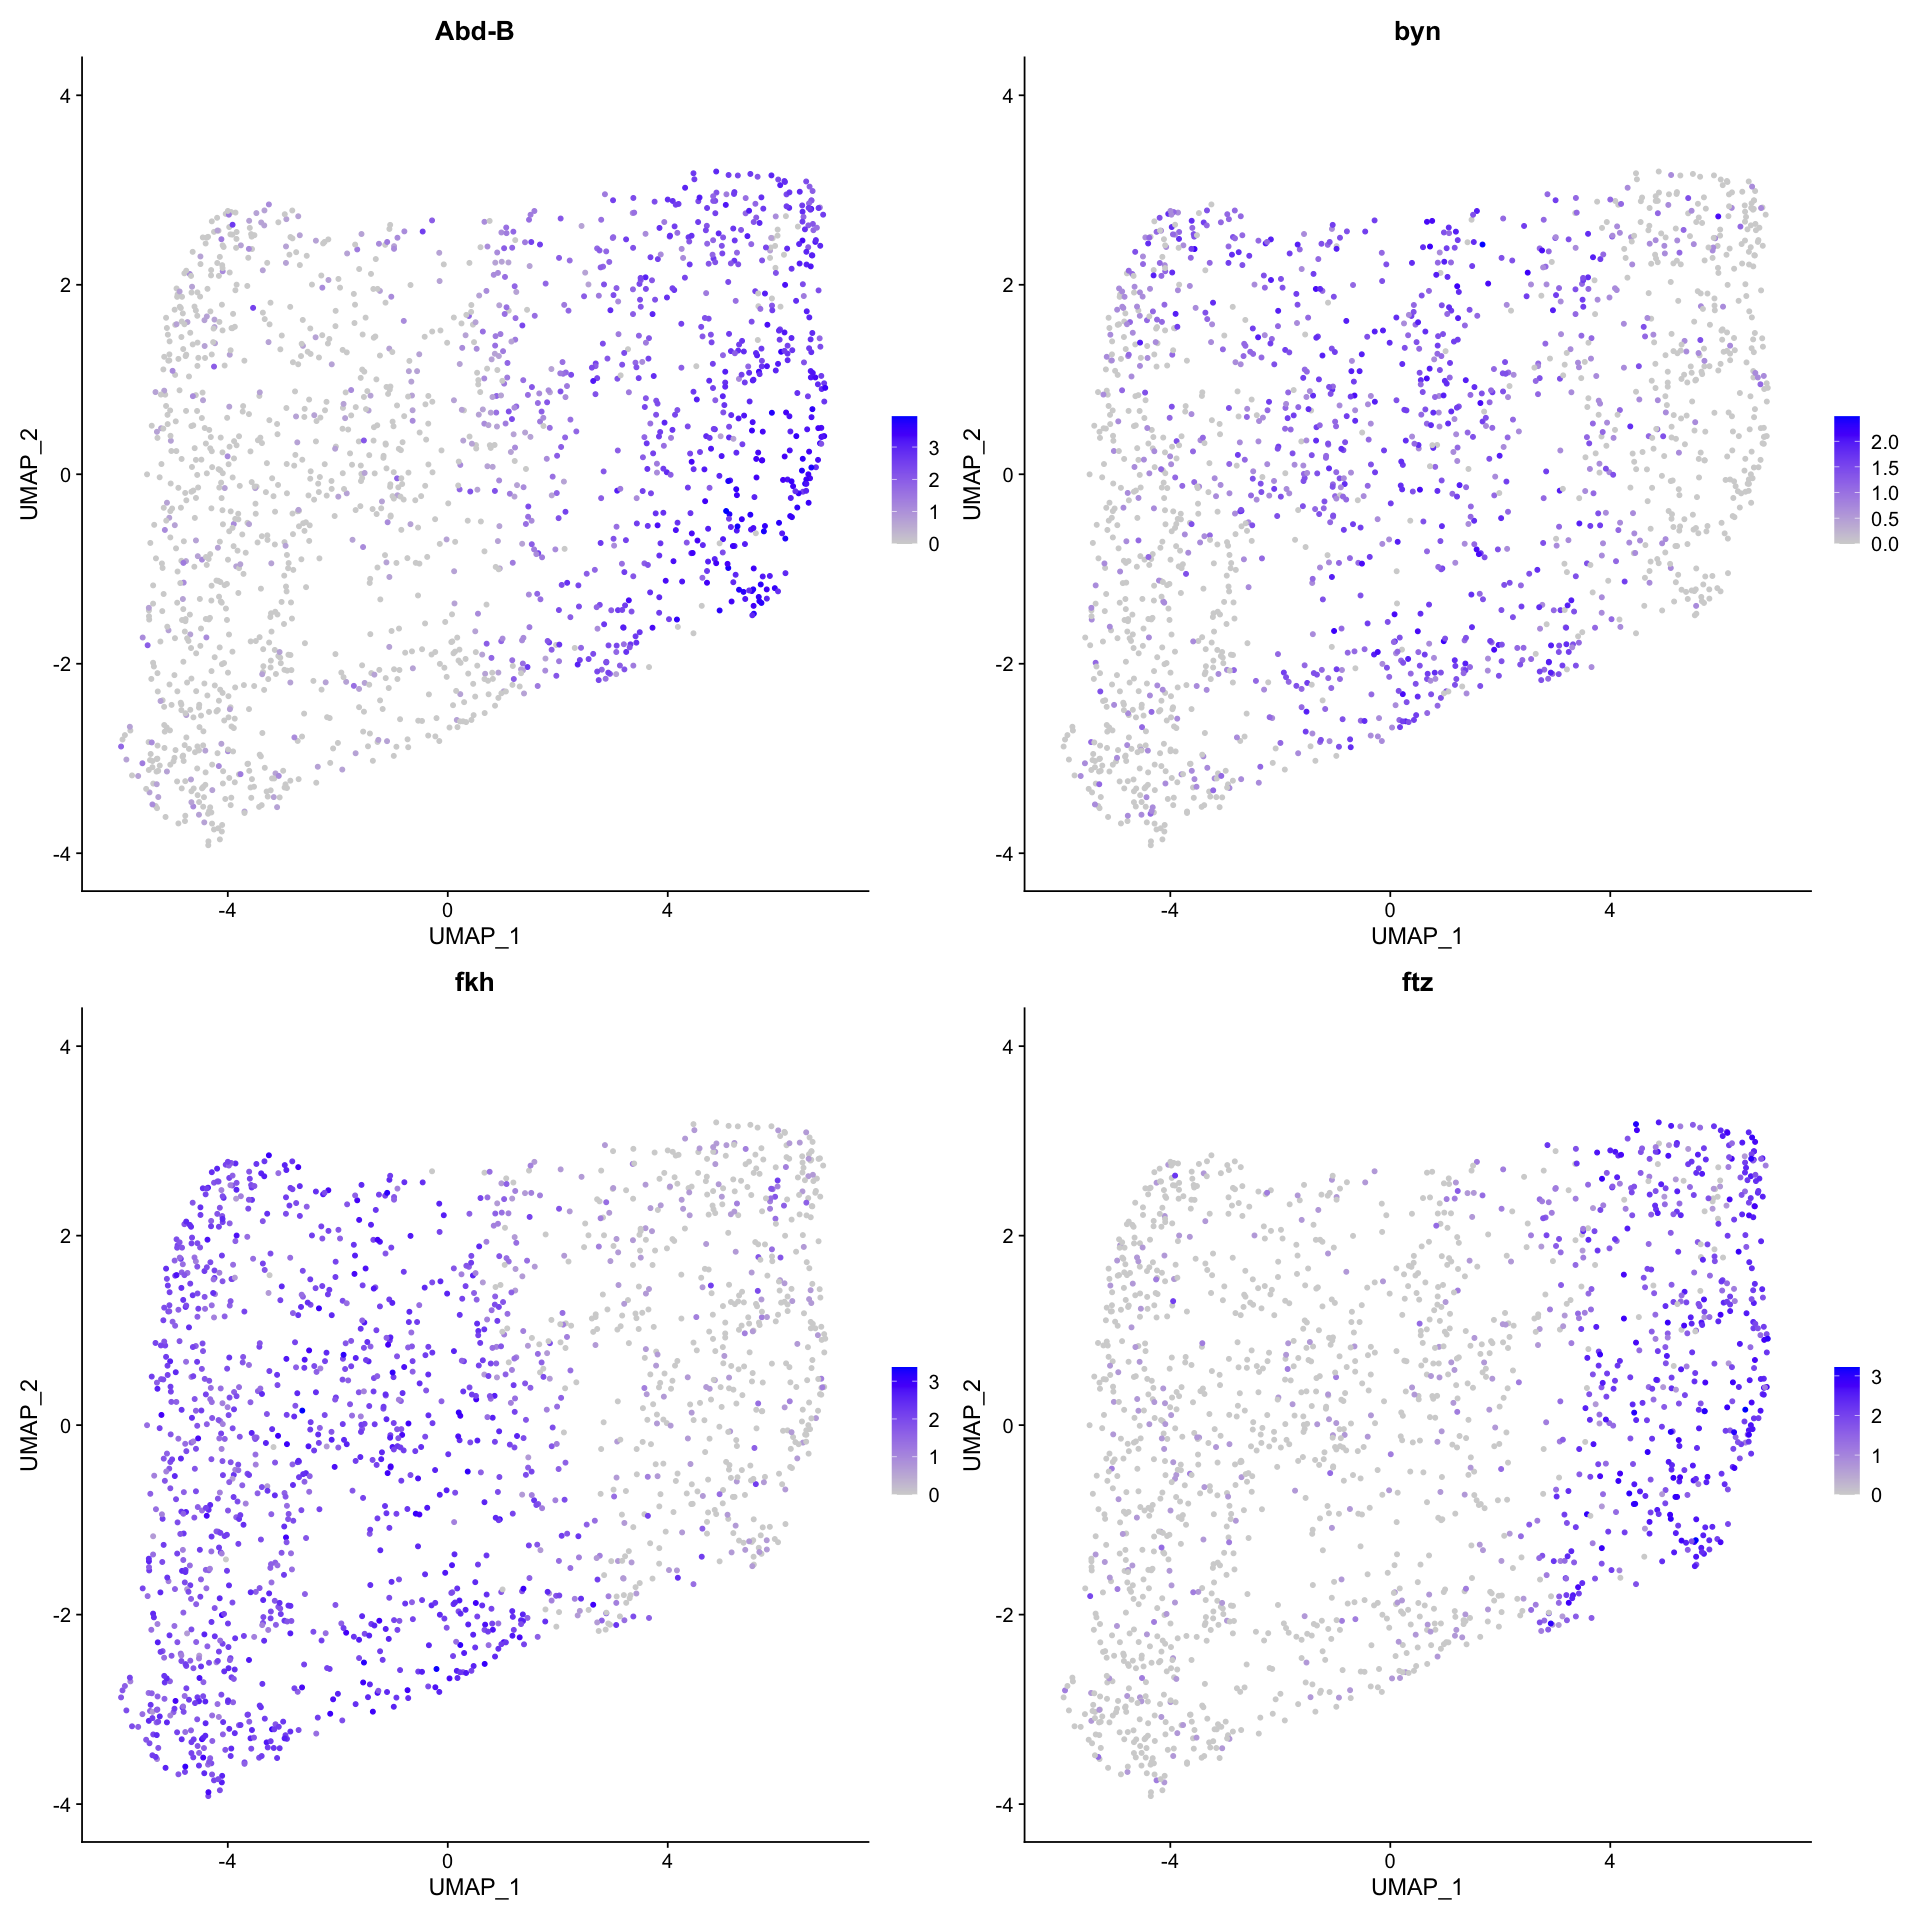

In [17]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.post, reduction = "umap", features = c("Abd-B", "byn", "fkh", "ftz"), pt.size = 1,  ncol = 2)

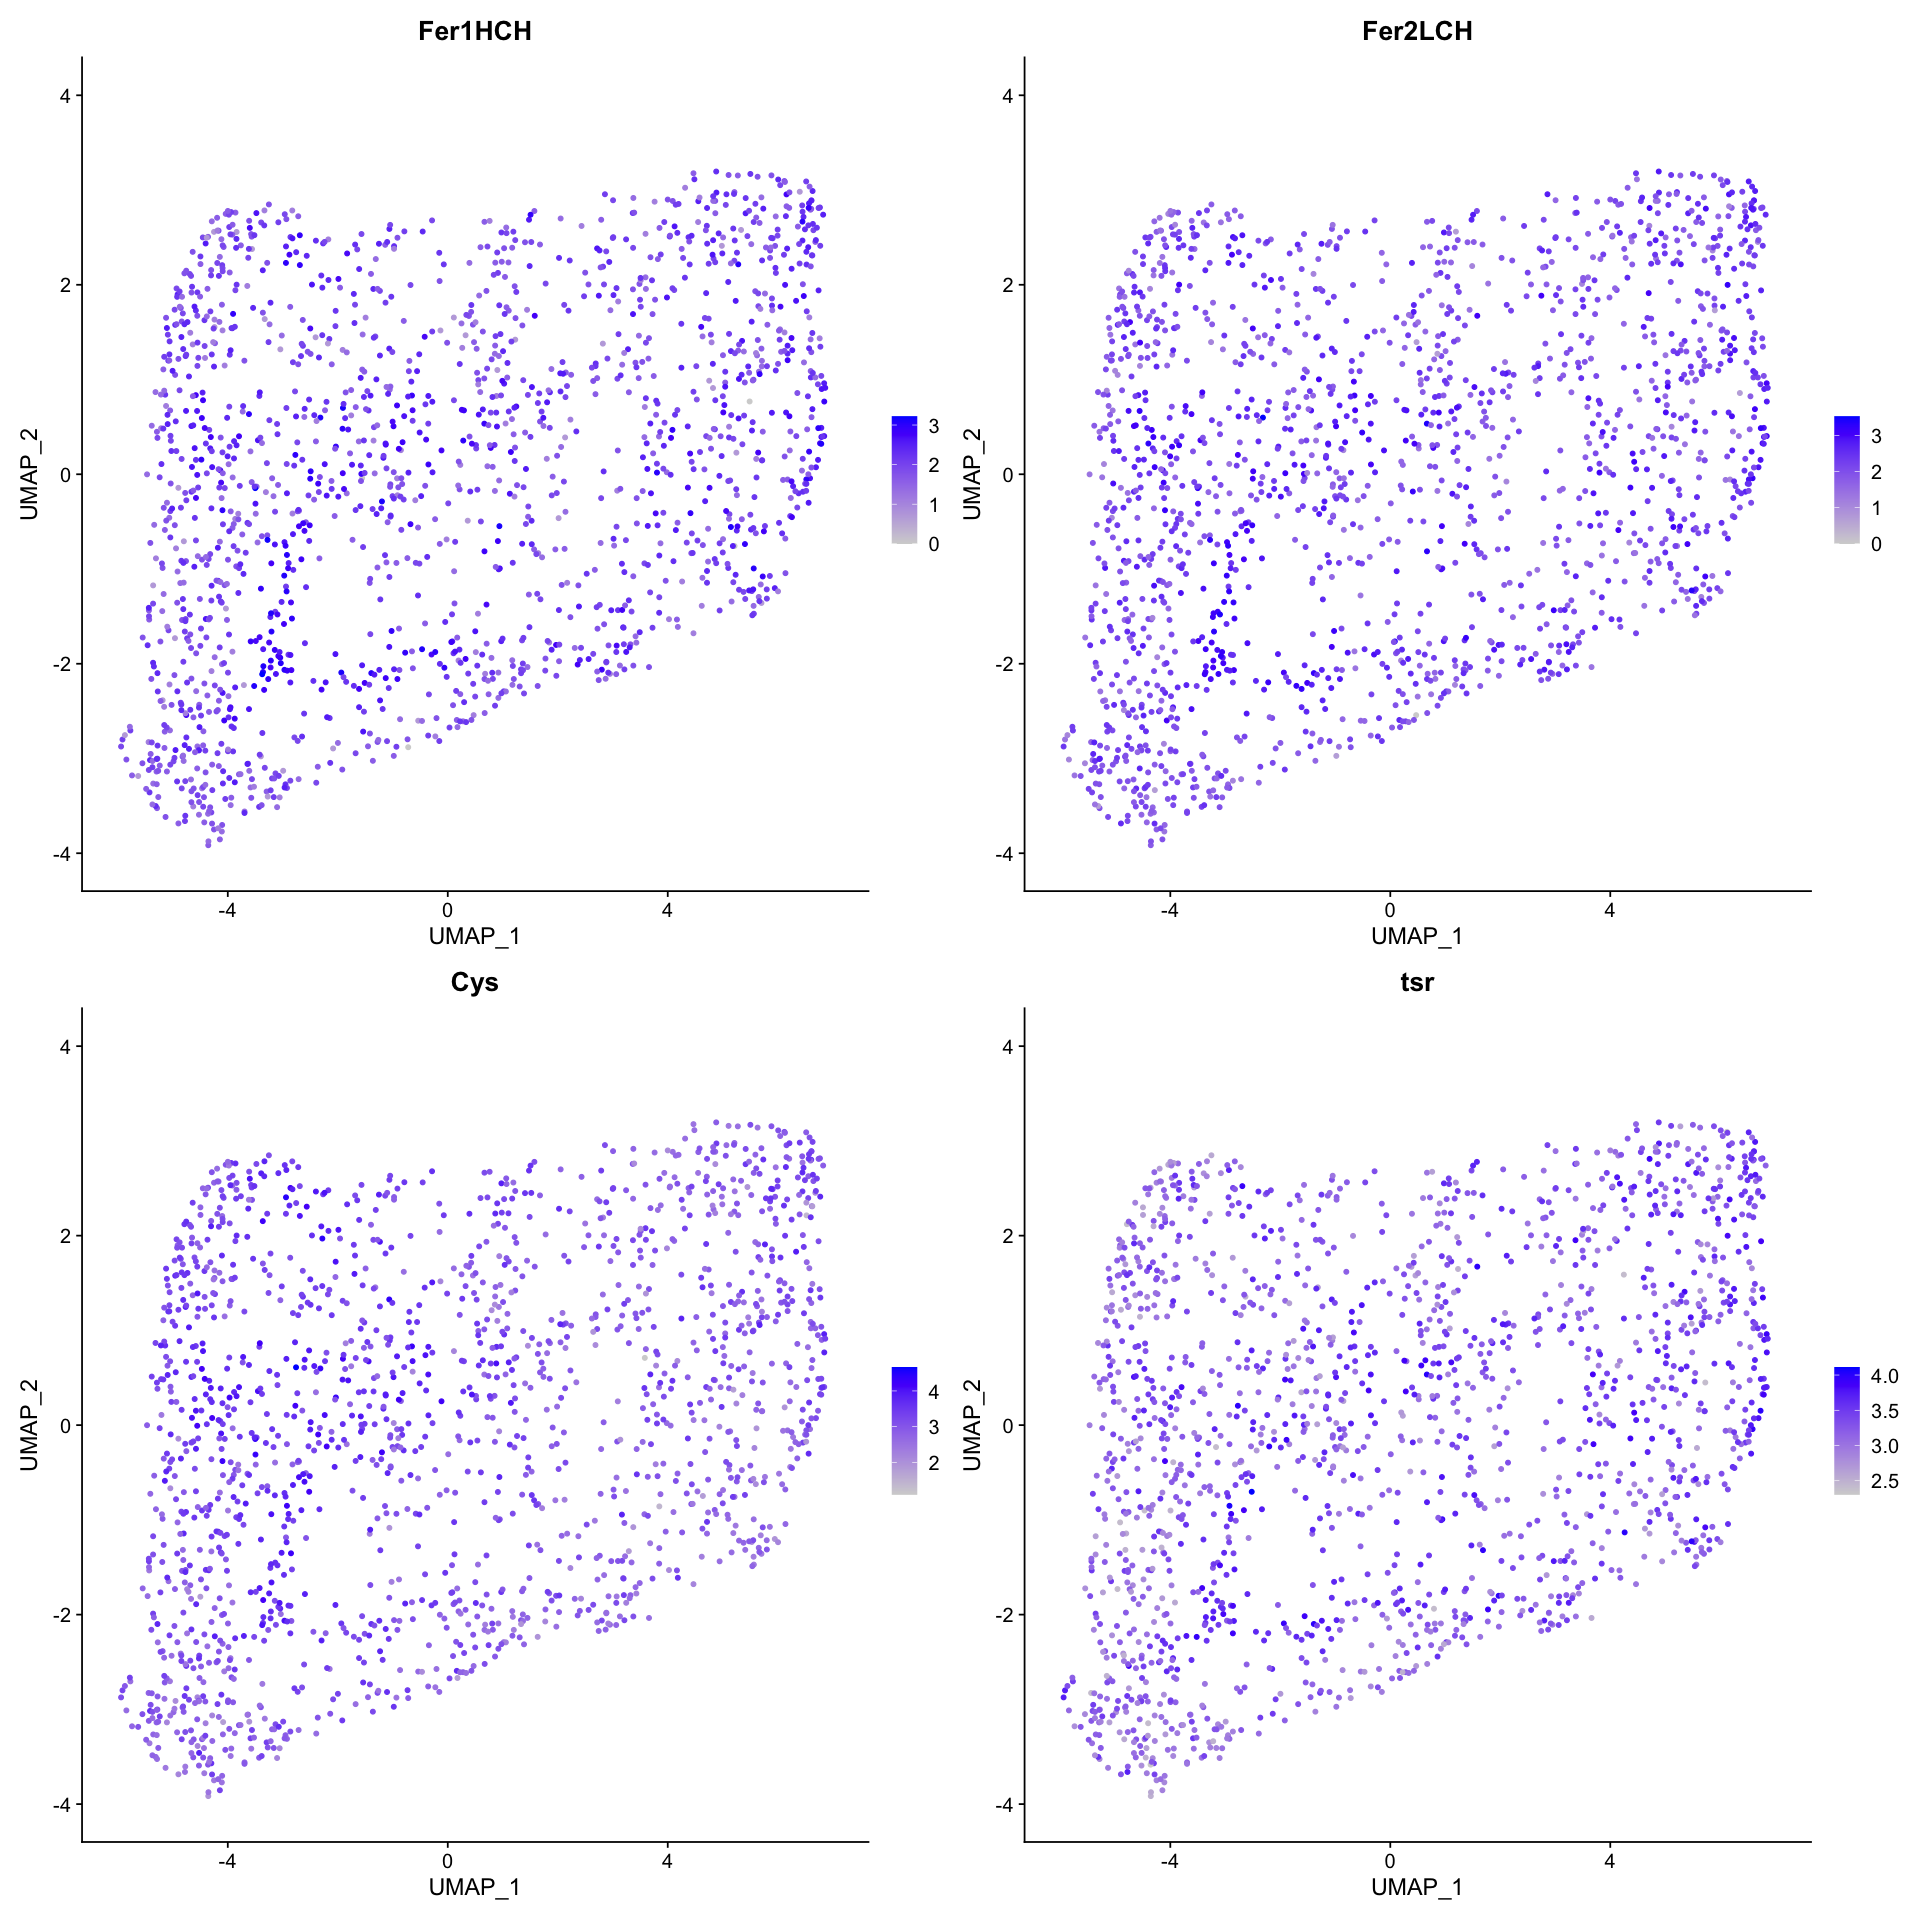

In [18]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.post, reduction = "umap", features = c("Fer1HCH", "Fer2LCH", "Cys", "tsr"), pt.size = 1,  ncol = 2)

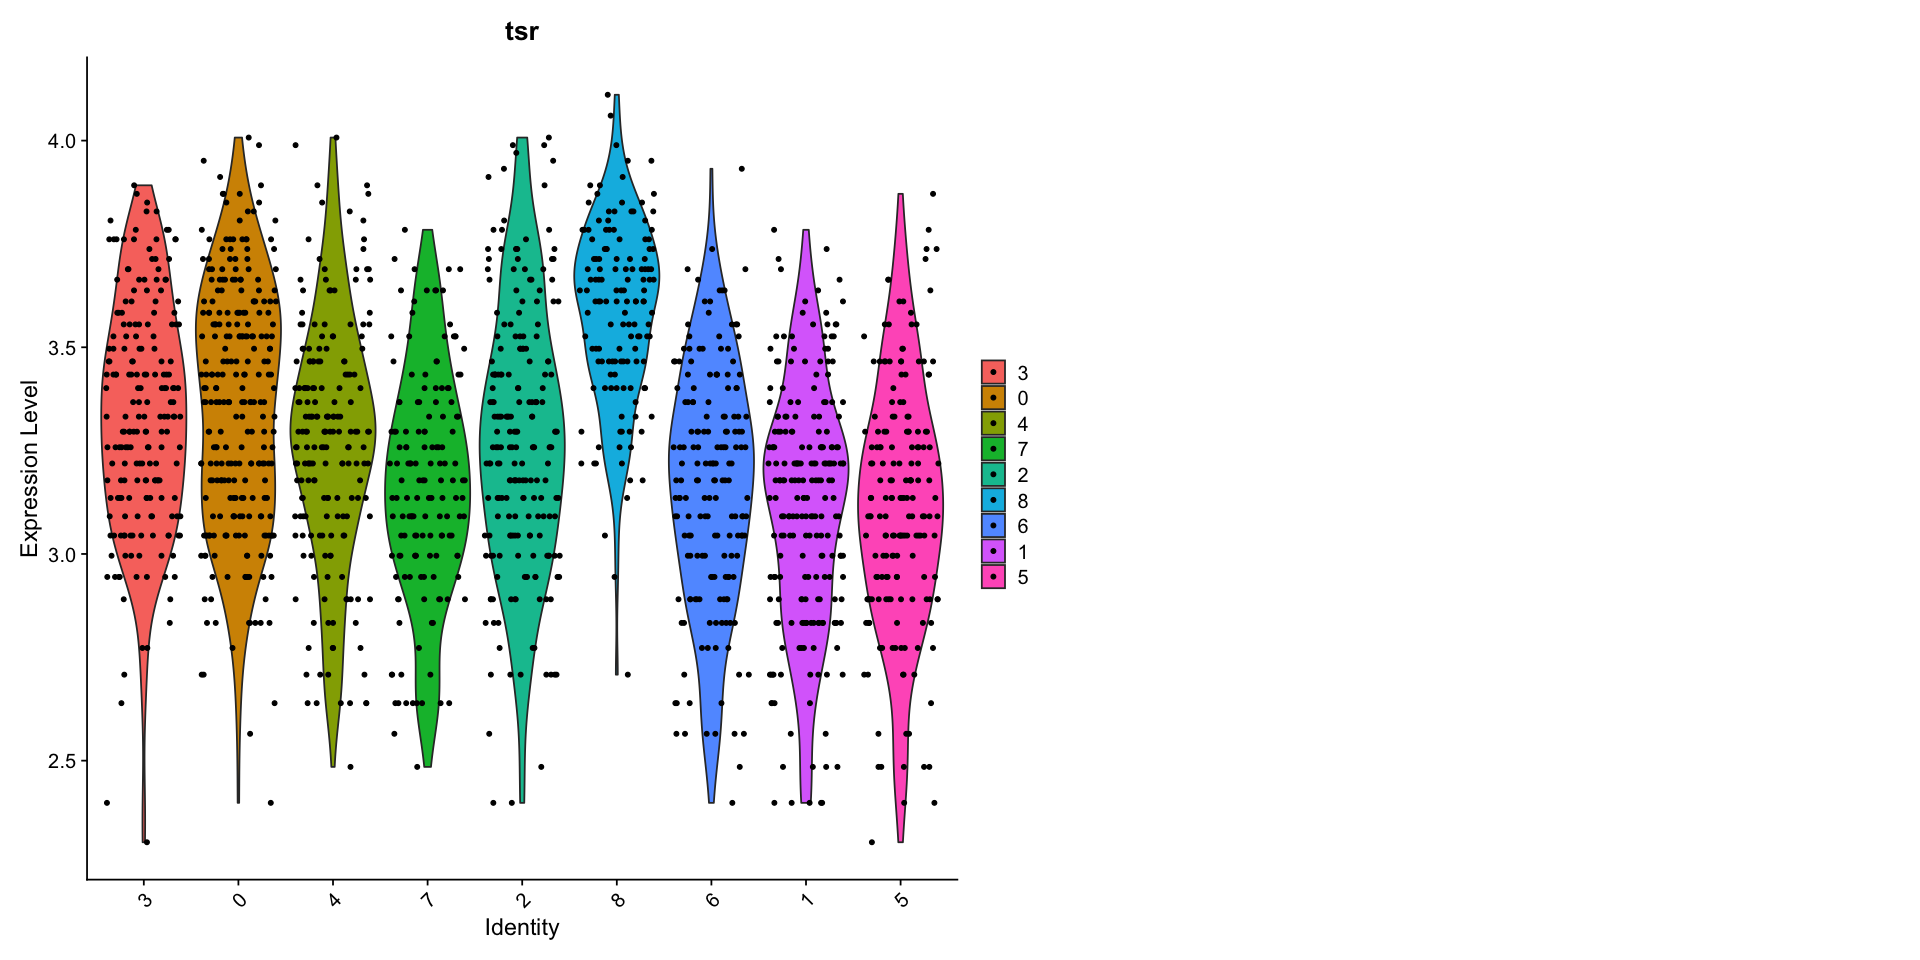

In [19]:
options(repr.plot.width=16, repr.plot.height=8)
VlnPlot(seu.post, features = c("tsr"),  ncol = 2)

cluster 8 was stressed cell cluster.  
However, its tsr expression lower than cells removed before and they shows clear fkh expression.  
cluster 8 was decided to remain.

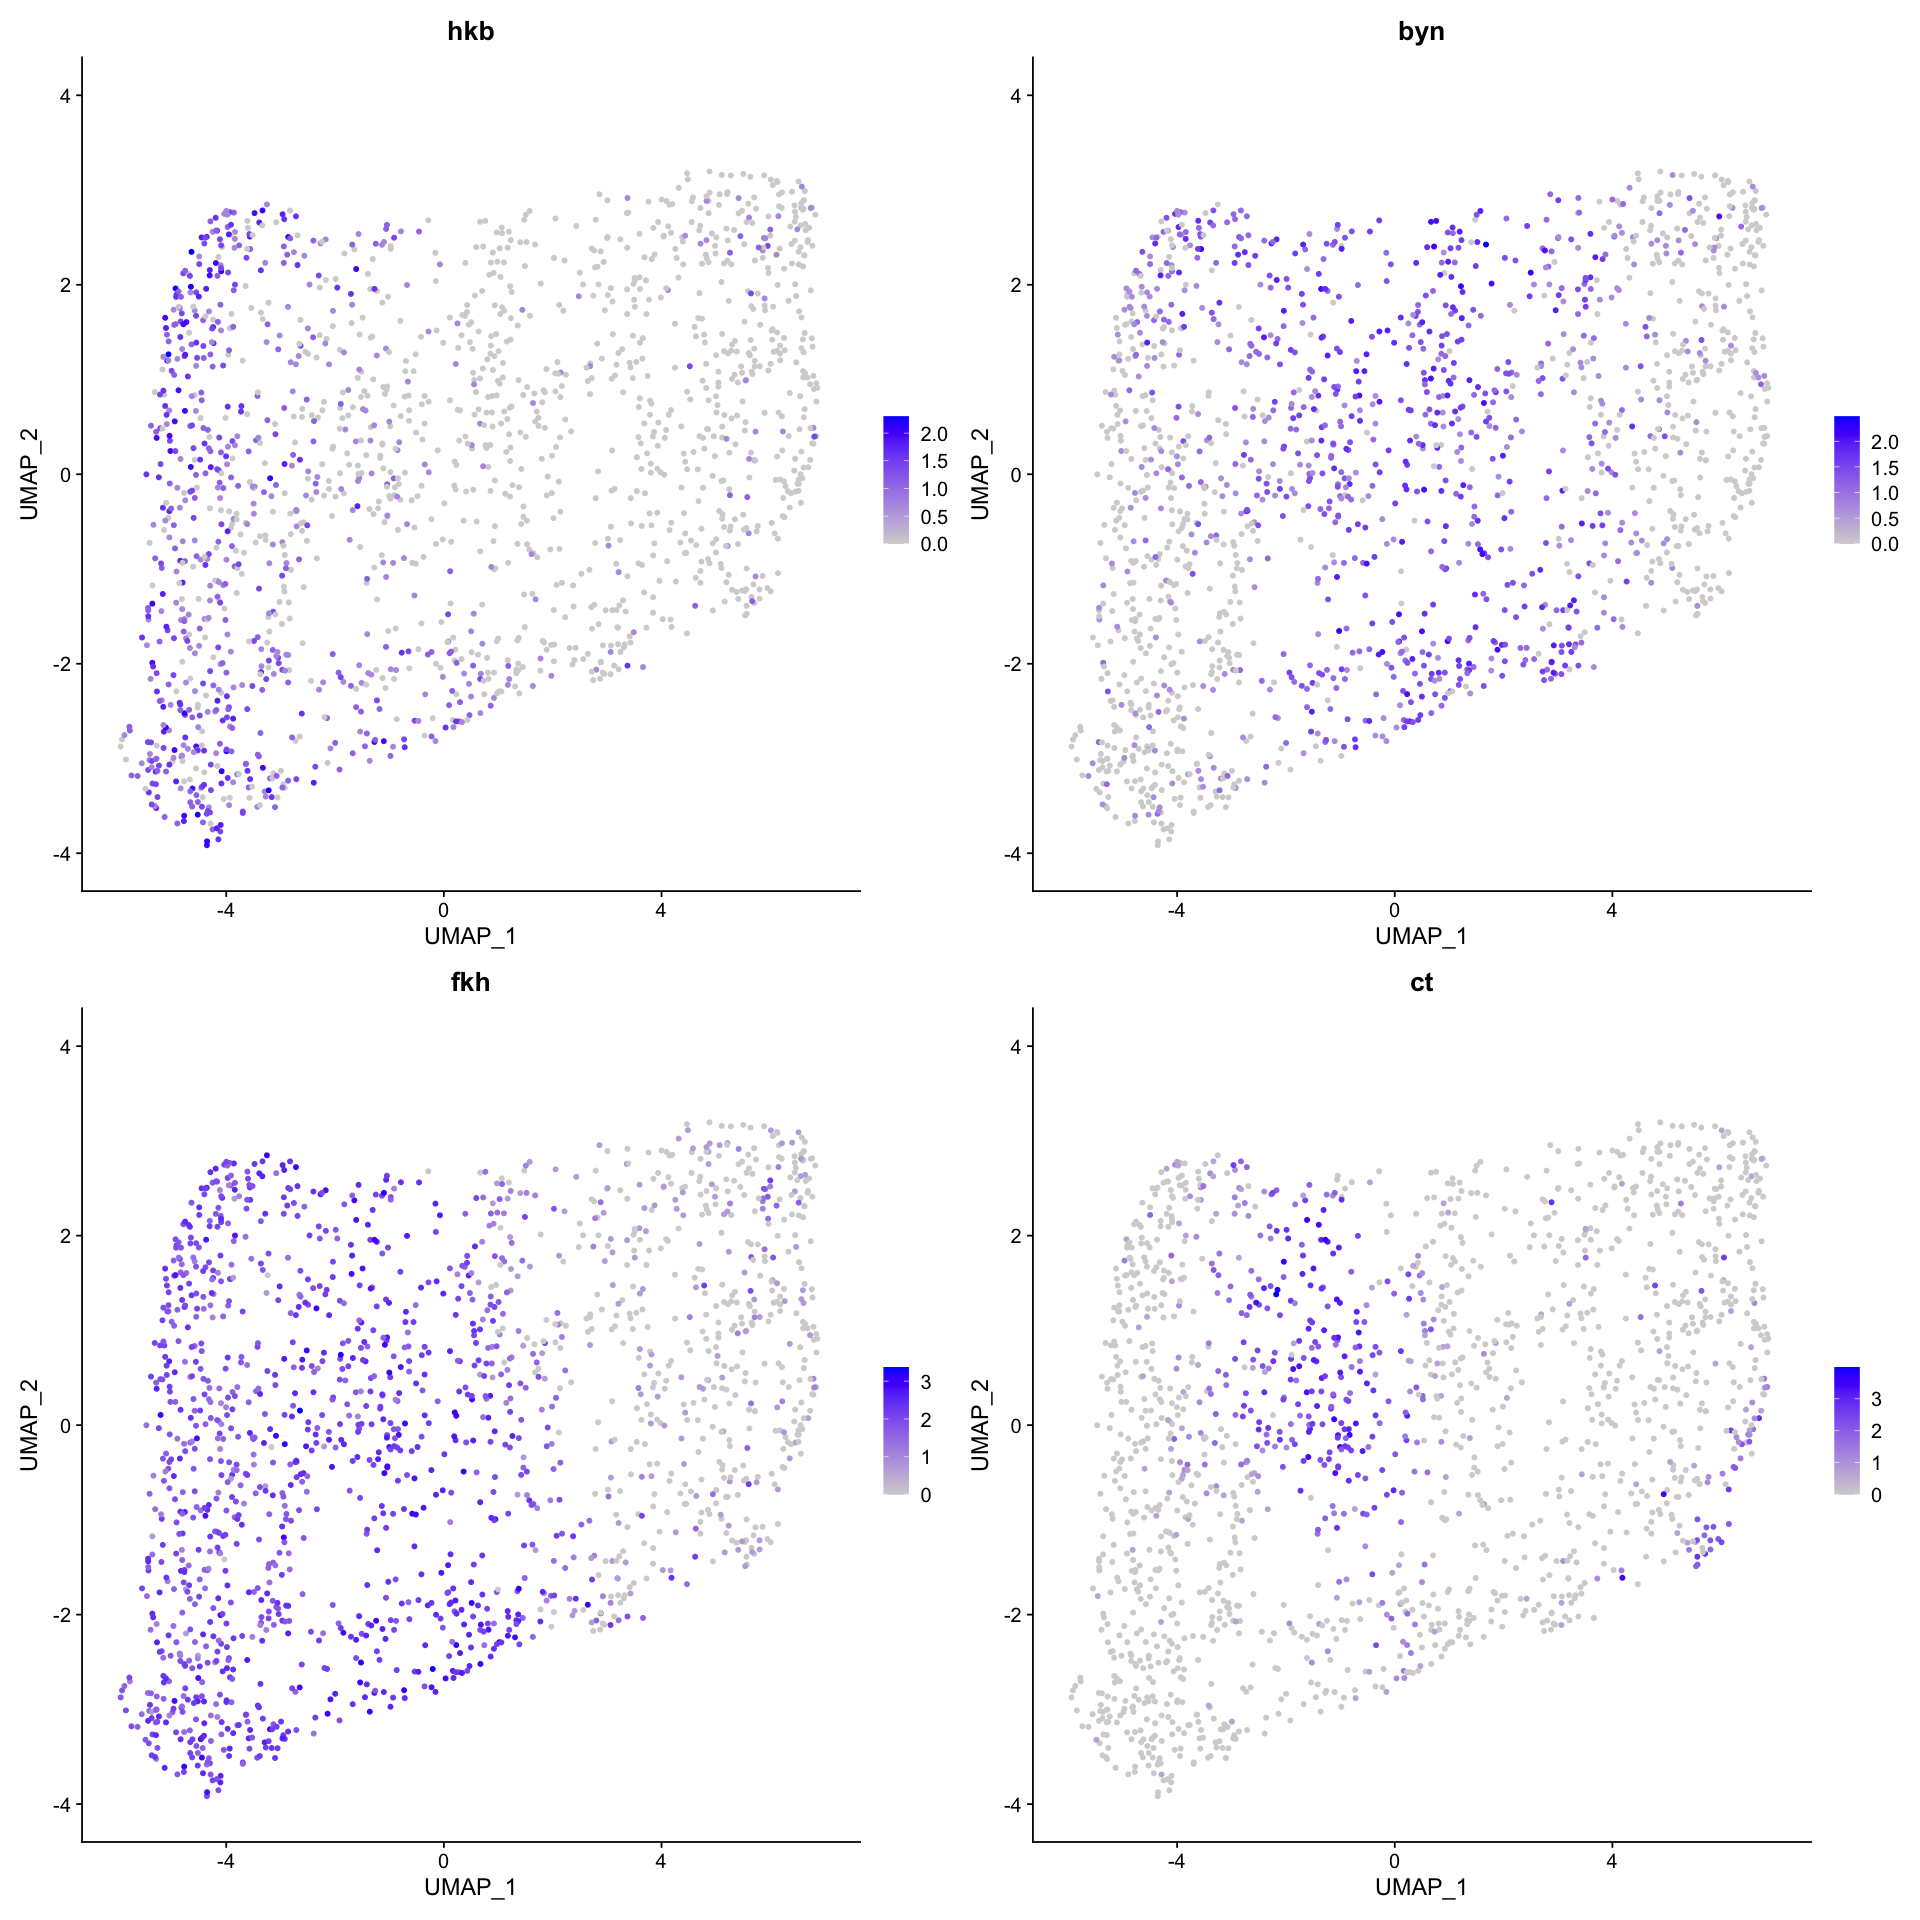

In [20]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.post, reduction = "umap", features = c("hkb", "byn", "fkh", "ct"), pt.size = 1,  ncol = 2)

## Cluster annotation

manual_ID
AAACCCATCACAGAGG 1        
AAACGCTCAAGCTCTA 8        
AAACGCTGTTGCTAGT 3        
AAAGAACAGCACTCGC 4        
AAAGAACAGTAGGAAG 1        
AAAGGATGTCCAGCGT 7

manual_ID               
AAACCCATCACAGAGG endoderm_postMG_lateral 
AAACGCTCAAGCTCTA endoderm_postMG_lateral 
AAACGCTGTTGCTAGT ectoderm_PS14_ventral   
AAAGAACAGCACTCGC ectoderm_PS14/hindgut   
AAAGAACAGTAGGAAG endoderm_postMG_lateral 
AAAGGATGTCCAGCGT ectoderm_hindgut_ventral

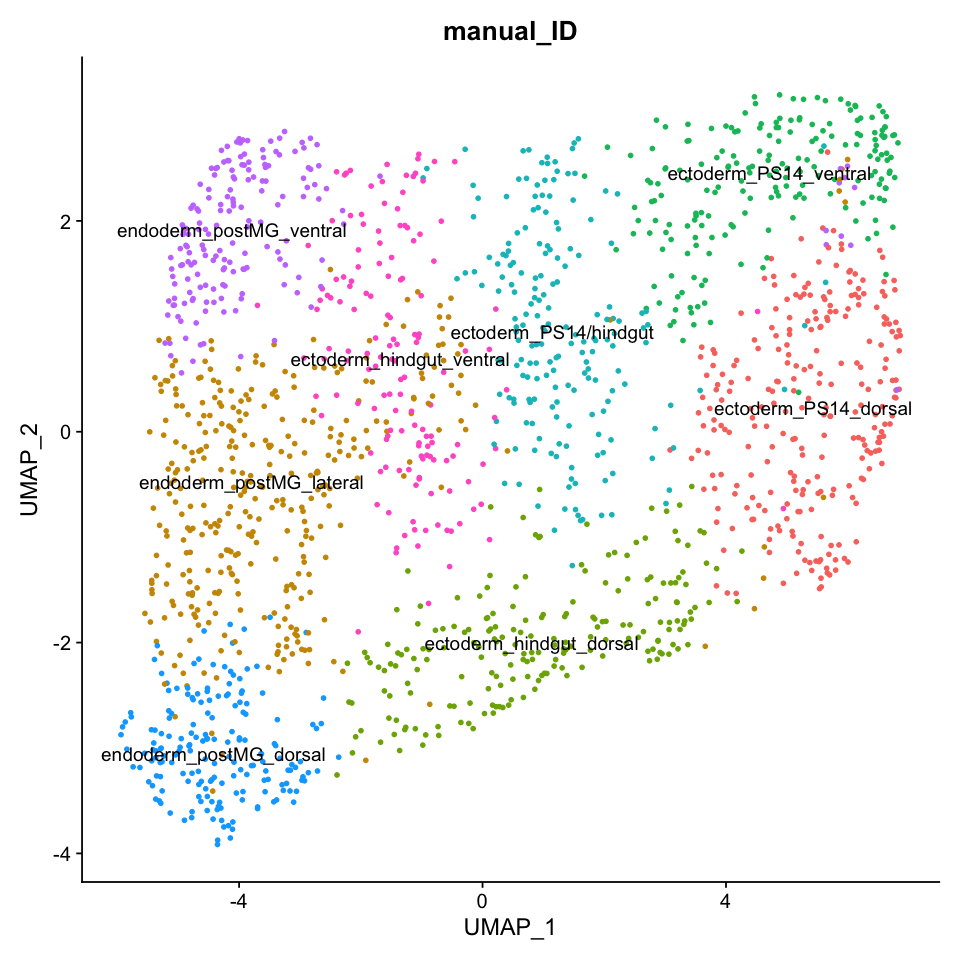

In [21]:
manual_id <- as.data.frame(seu.post$seurat_clusters)
colnames(manual_id) <- c('manual_ID')
head(manual_id)
manual_id$manual_ID = dplyr::recode(manual_id$manual_ID, 
                                     "4"="ectoderm_PS14/hindgut", #Abd-B+, byn+
                                     "3"="ectoderm_PS14_ventral",  #Abd-B+, sog+, byn-
                                     "1"="endoderm_postMG_lateral", #ps+, hkb+,
                                     "5"="endoderm_postMG_dorsal", #ps+, hkb+, tup+
                                     "0"="ectoderm_PS14_dorsal", #Abd-B+, sog-, byn-
                                     "6"="endoderm_postMG_ventral",#ps+, hkb+, sim+
                                     "2"="ectoderm_hindgut_dorsal", #byn+, Abd-B-, Doc3+
                                     "7"="ectoderm_hindgut_ventral", #byn+, Abd-B-,
                                     "8"="endoderm_postMG_lateral", #ps+
                                   )
                                    

head(manual_id)
seu.post$manual_ID <- manual_id
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.post, reduction = 'umap', label = T, group.by = 'manual_ID') + NoLegend() 

In [22]:
Idents(seu.post) <- 'manual_ID'
levels(seu.post) <- c('ectoderm_PS14_ventral','ectoderm_PS14_dorsal',
                     'ectoderm_PS14/hindgut',
                     'ectoderm_hindgut_ventral','ectoderm_hindgut_dorsal',
                     'endoderm_postMG_ventral','endoderm_postMG_lateral','endoderm_postMG_dorsal')

all.markers.post <- FindAllMarkers(object = seu.post, only.pos = TRUE)
nrow(all.markers.post)
all.markers.post.top10 <- all.markers.post %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.post.top10)

Calculating cluster ectoderm_PS14_ventral

Calculating cluster ectoderm_PS14_dorsal

Calculating cluster ectoderm_PS14/hindgut

Calculating cluster ectoderm_hindgut_ventral

Calculating cluster ectoderm_hindgut_dorsal

Calculating cluster endoderm_postMG_ventral

Calculating cluster endoderm_postMG_lateral

Calculating cluster endoderm_postMG_dorsal



[1] 819

[1] 80

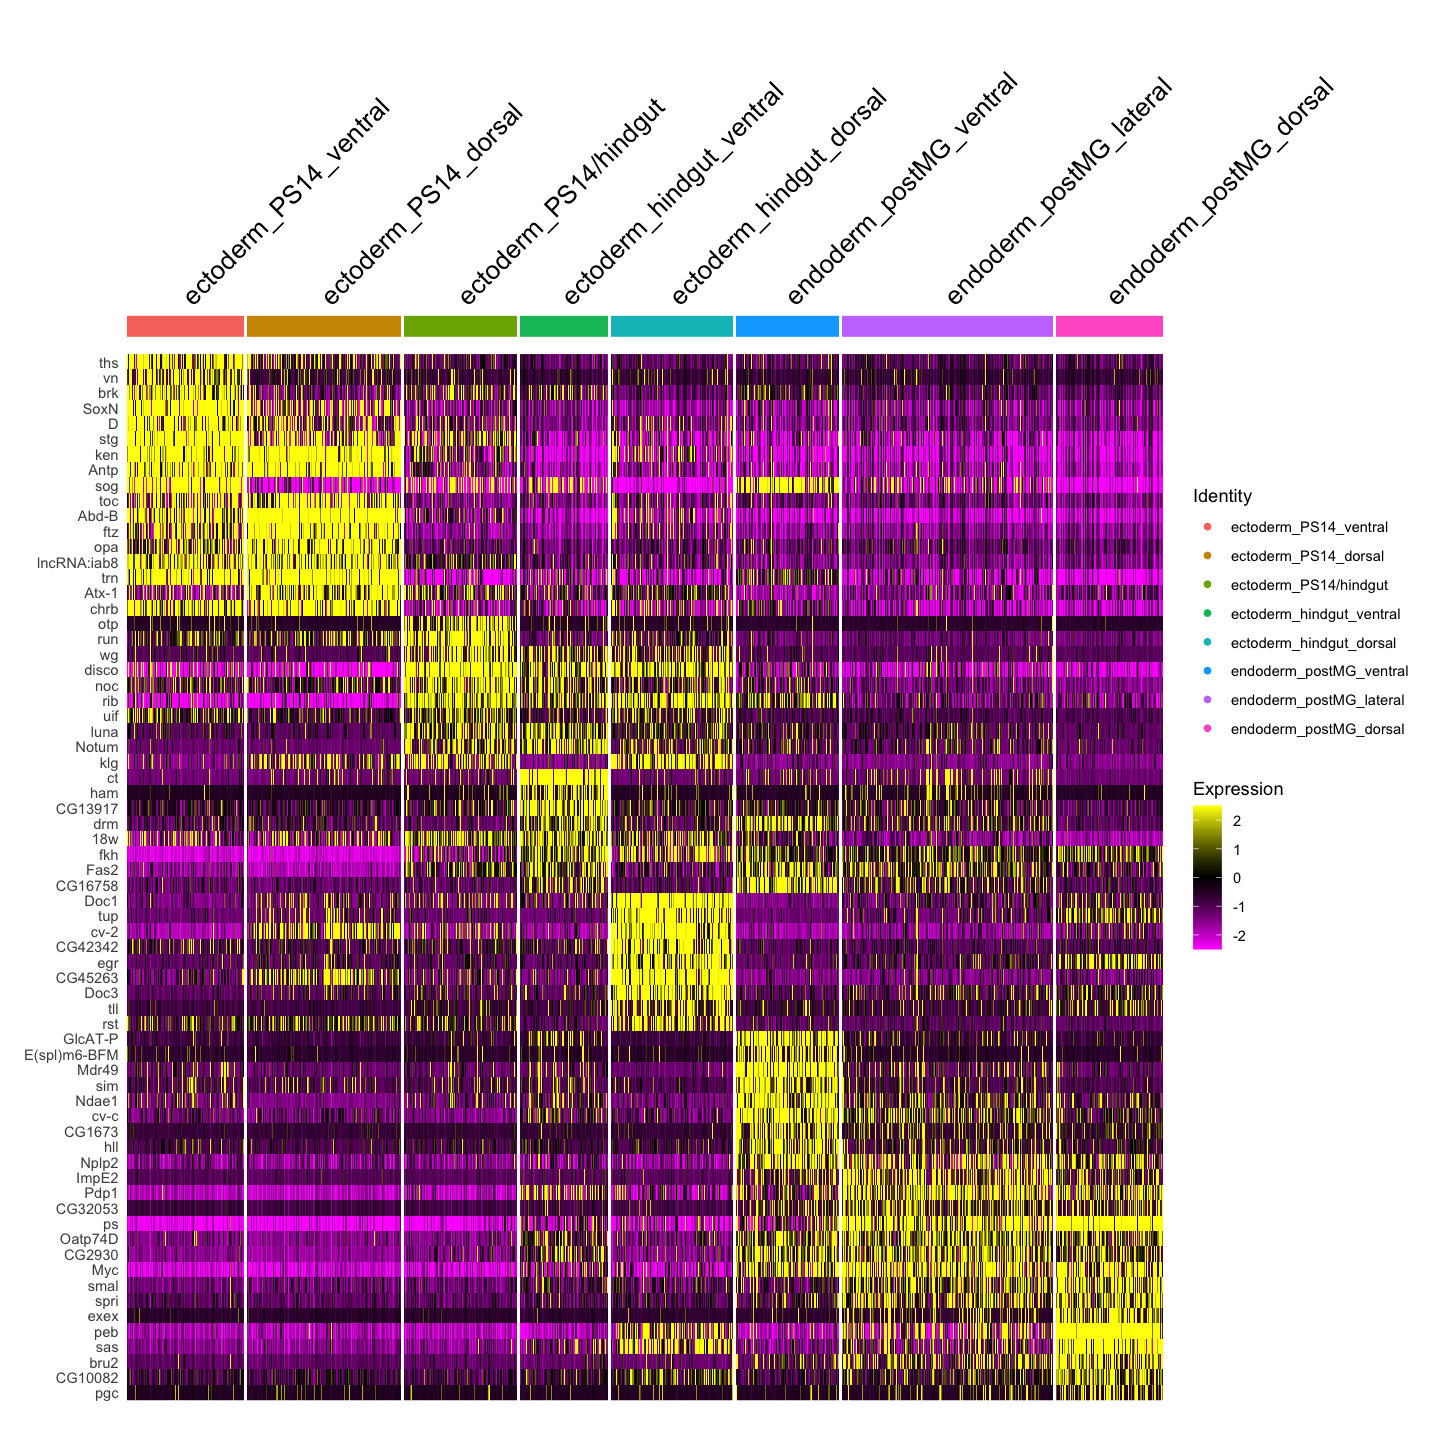

In [23]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.post, features = c(all.markers.post.top10$gene))

Saving 7 x 7 in image



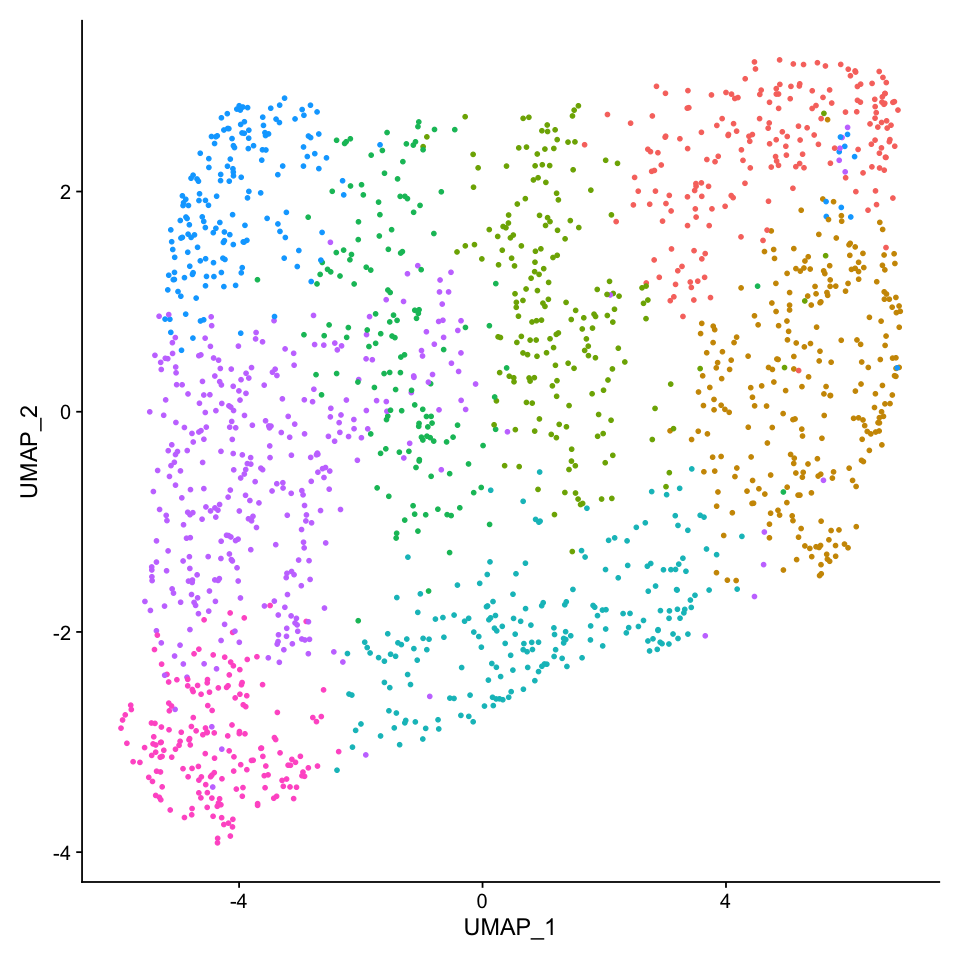

In [24]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.post, reduction =  "umap", label = FALSE) + NoLegend() 

fig
ggsave(fig, file = "./figures/05_post_subclustering_bcdRNAi/post_umap1.eps", dpi = 300)

Saving 7 x 7 in image



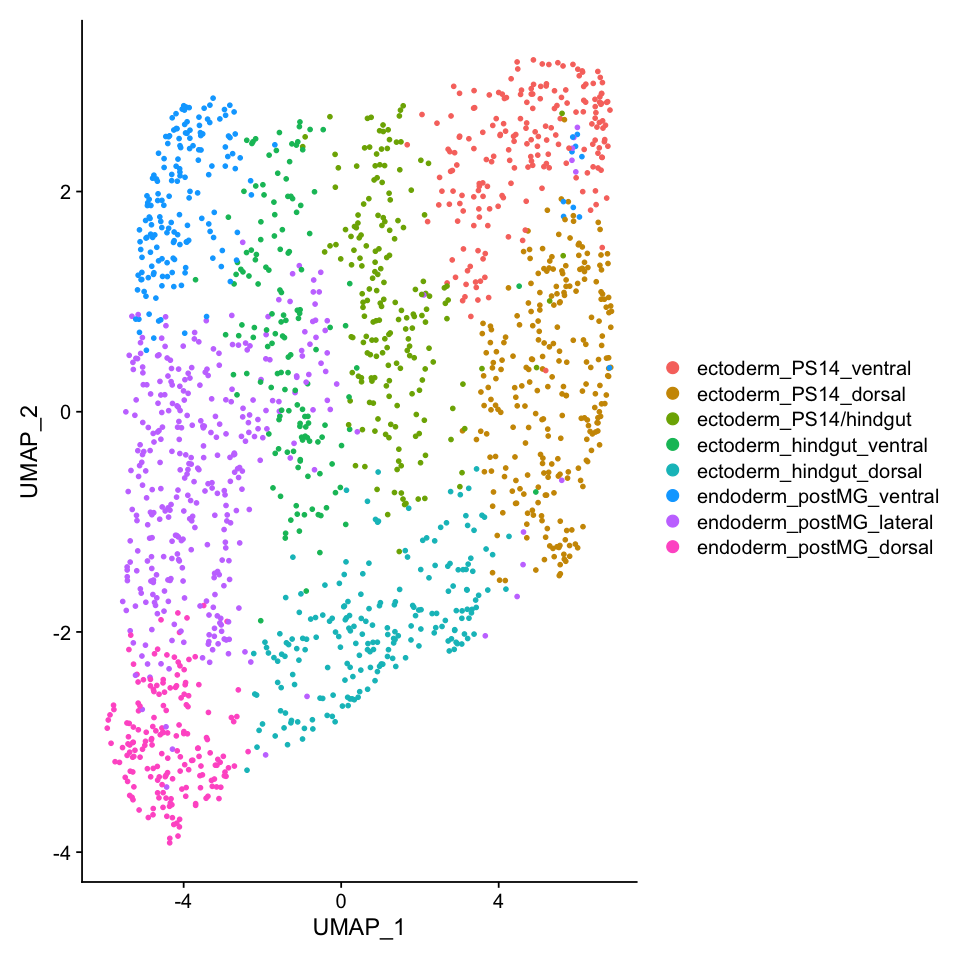

In [25]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.post, reduction =  "umap", label = FALSE)

fig
ggsave(fig, file = "./figures/05_post_subclustering_bcdRNAi/post_umap2.eps", dpi = 300)

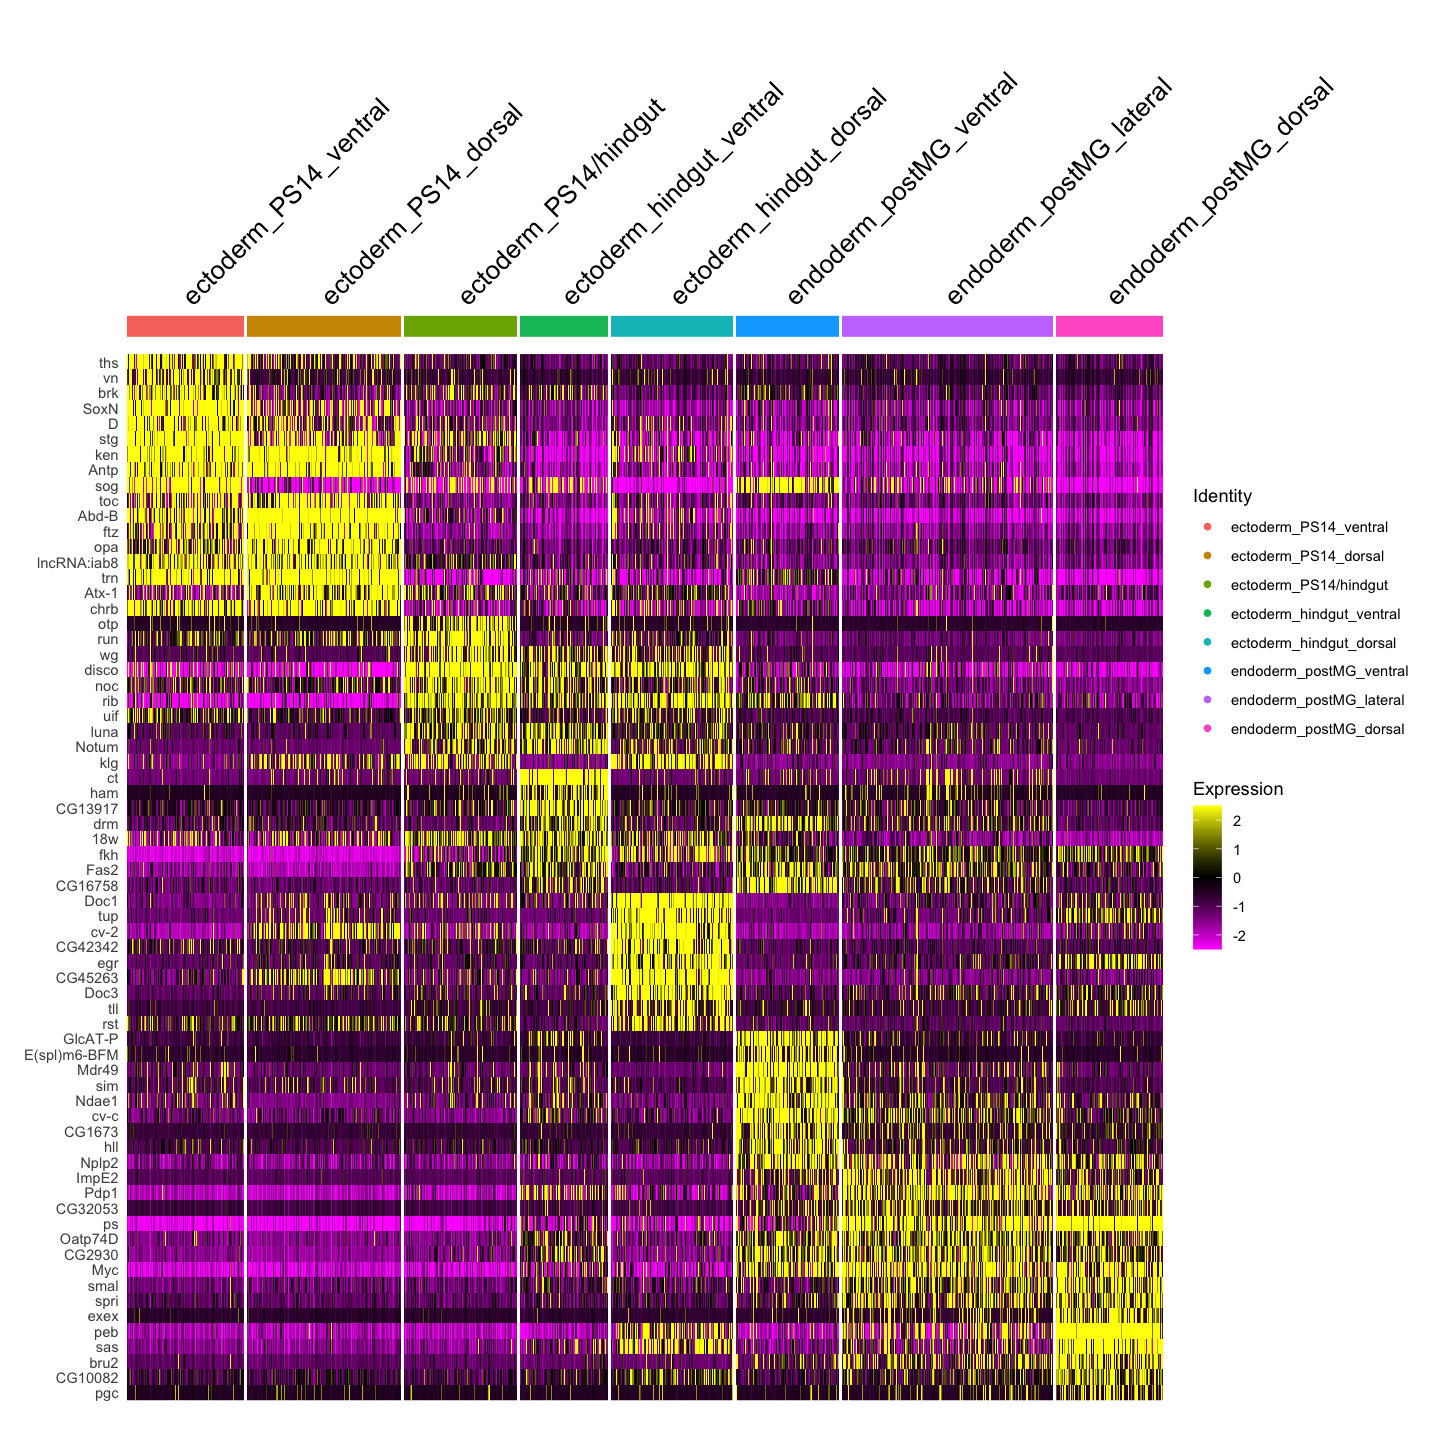

In [26]:
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu.post, features = c(all.markers.post.top10$gene))
fig
ggsave(fig, file = "./figures/05_post_subclustering_bcdRNAi/post_manualID_heatmap.eps", dpi = 300,  width = 12, height = 8)

In [27]:
seu.others <- subset(seu_HQC, cells = colnames(seu.post), invert = T)
seu.others$manual_ID <- 'others'
seu.merge <- merge(seu.post, seu.others)
seu_HQC$manual_ID <- seu.merge$manual_ID

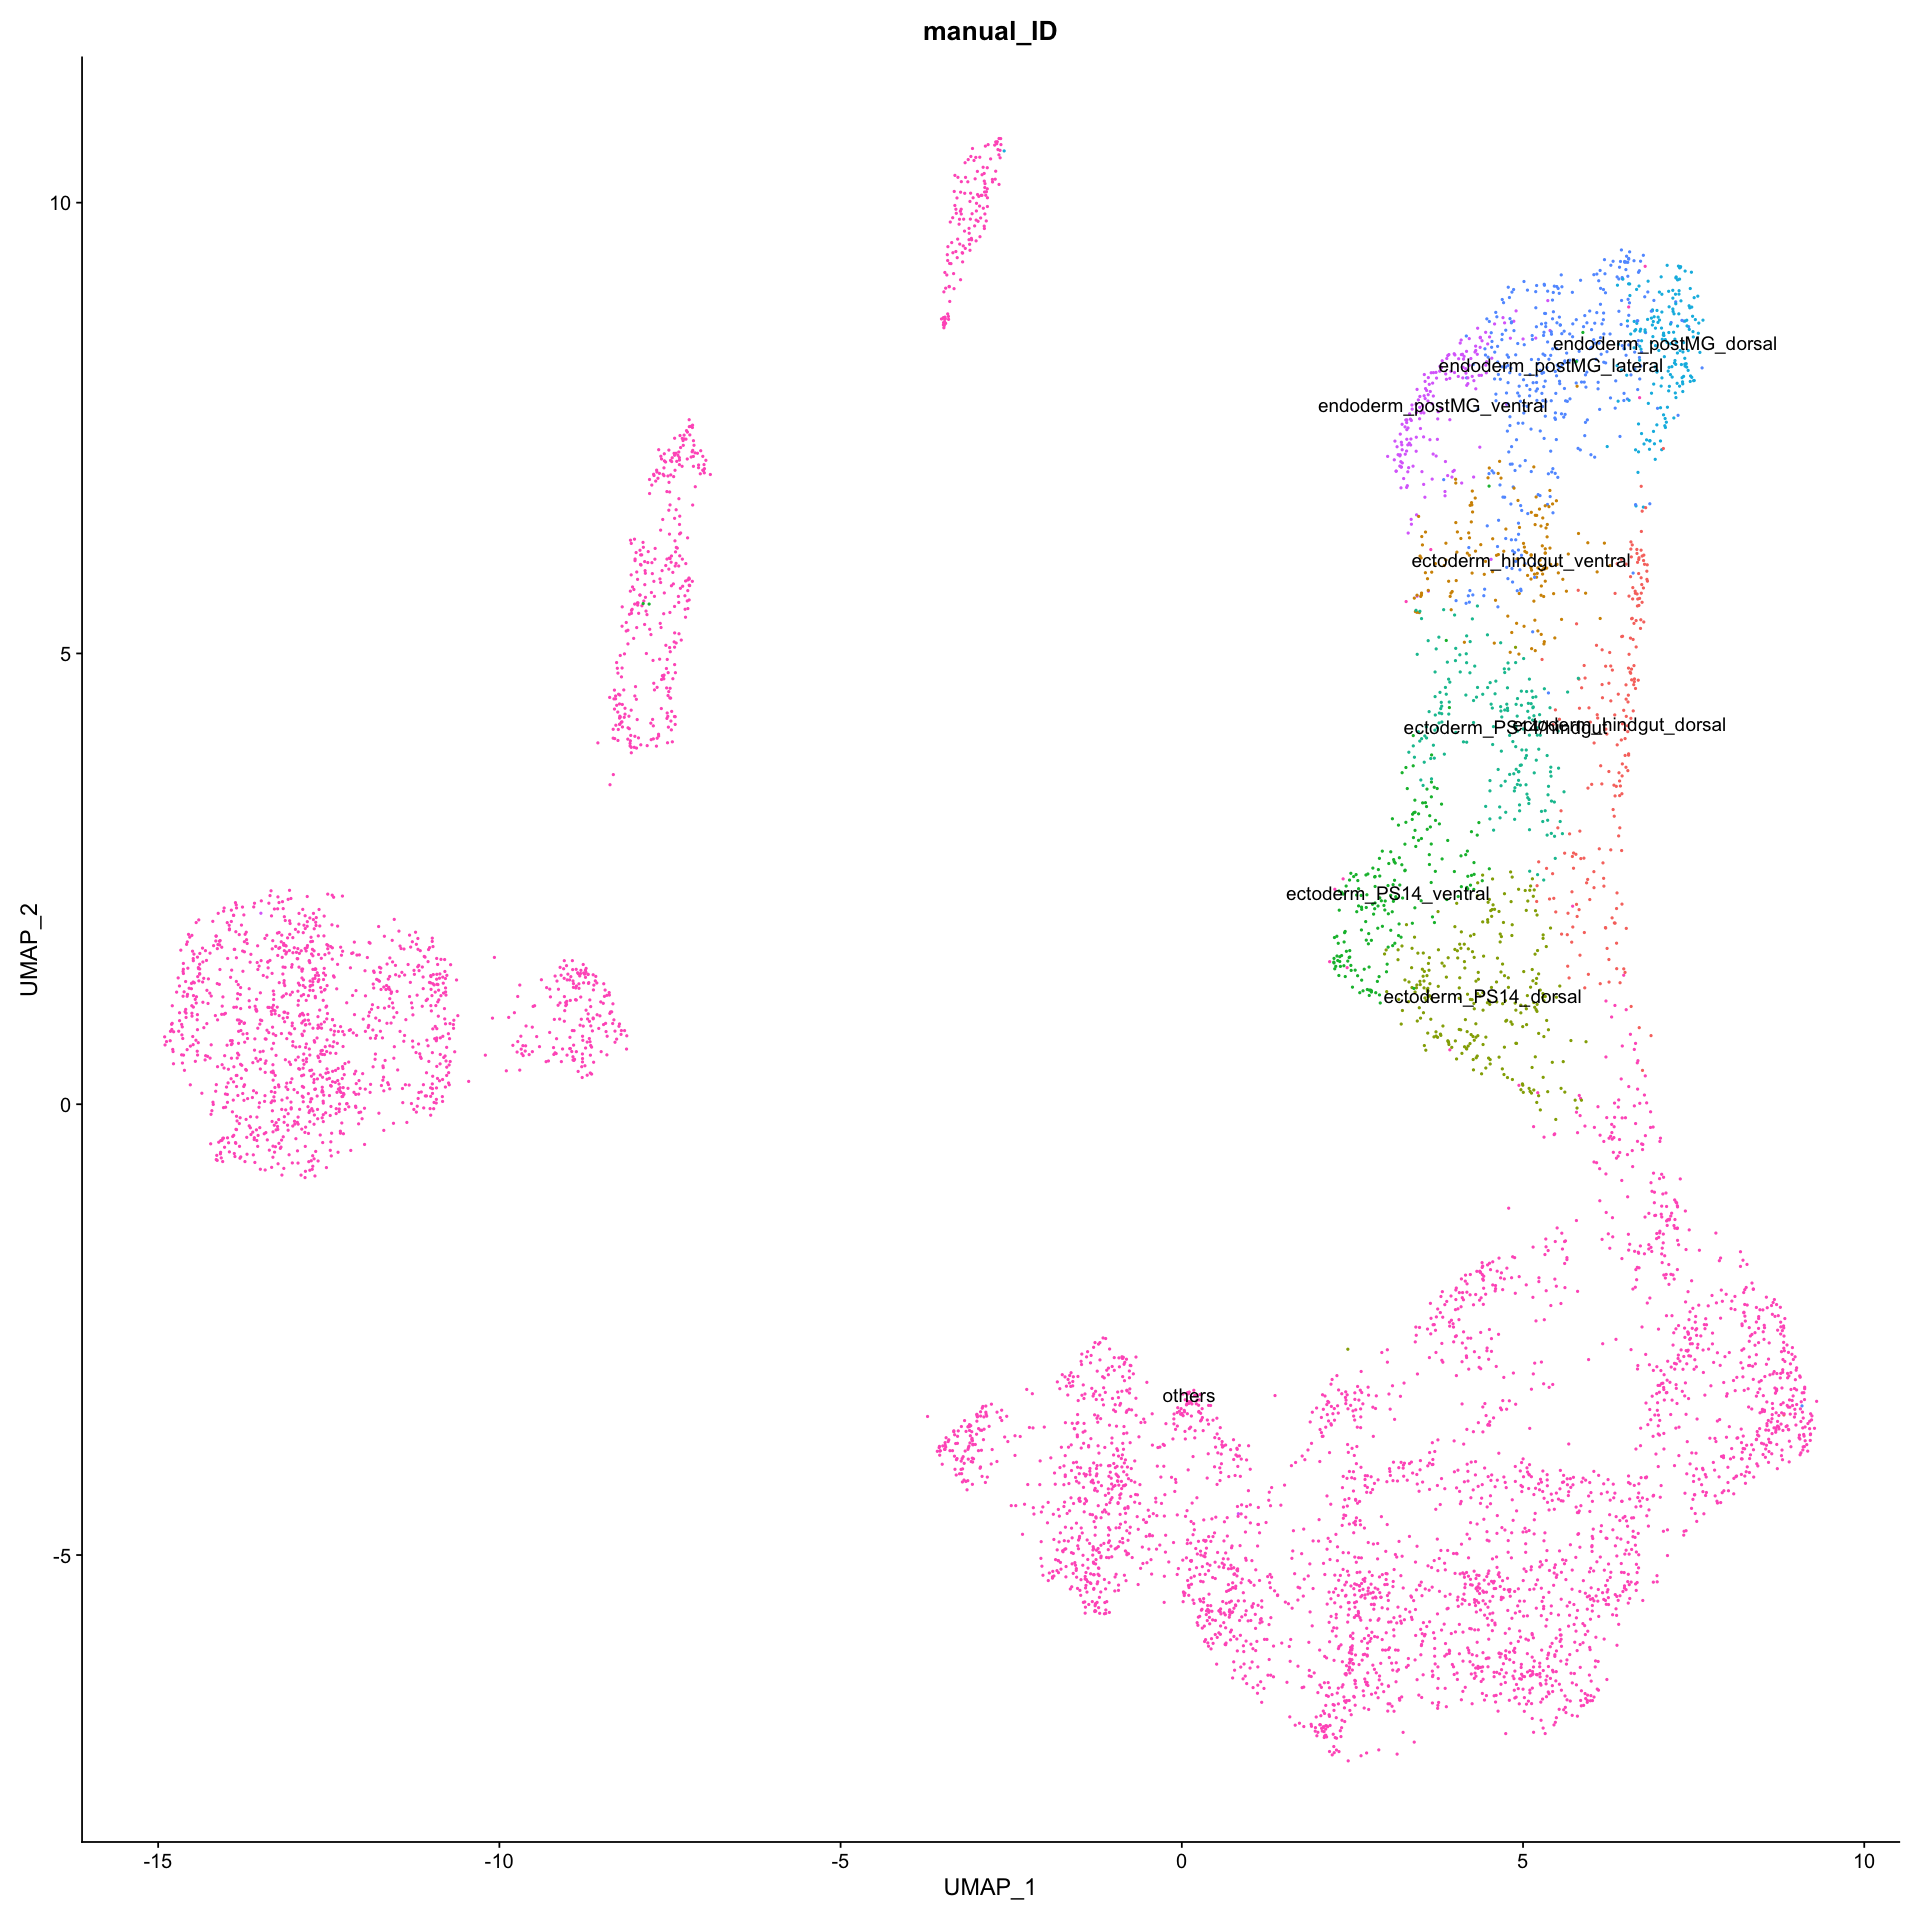

In [28]:
options(repr.plot.width=16, repr.plot.height=16)
DimPlot(seu_HQC, reduction =  "umap", label = TRUE, group.by = 'manual_ID') + NoLegend()

In [29]:
saveRDS(seu.post, file = '../../data/seurat_object/bcdRNAi/subclustering/subclustering_post_bcdRNAi.obj')